# **Hotel Booking Demand**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **1. Business Problem Understanding**

### **Context**

Kebutuhan masyarakat akan akomodasi yang nyaman saat bepergian membuat industri perhotelan terus berkembang. Dua jenis hotel yang paling sering dibandingkan berdasarkan lokasi dan target pasarnya adalah Resort Hotel dan City Hotel.
- **Resort Hotel** biasanya terletak di daerah wisata dan mengutamakan pengalaman menginap yang santai serta fasilitas rekreasi.
- **City Hotel** berada di pusat kota dan sering digunakan oleh wisatawan bisnis atau tamu yang membutuhkan akses mudah ke transportasi dan pusat bisnis.

Namun, tren perjalanan saat ini menunjukkan bahwa banyak orang menginginkan kombinasi antara bisnis dan rekreasi [bleisure travel](https://blog.hotelogix.com/business-leisure-travel-trends/), yang membuat city hotel perlu menyesuaikan fasilitasi mereka agar lebih menarik bagi wisatawan.
Di tengah upaya menarik pelanggan, salah satu tantangan terbesar yang dihadapi city hotel yaitu **pembatalan reservasi yang cukup tinggi (42,72%)**. Hal ini berdampak langsung pada pendapatan dan efisiensi operasional hotel.

Pembatalan reservasi yang tinggi menyebabkan:
- **Kerugian finansial**, terutama jika kamar yang dibatalkan tidak dapat terisi kembali.
- **Ketidakseimbangan dalam alokasi sumber daya**, seperti pengelolaan staf dan persediaan logistik.
- **Dampak operasional pada layanan non-kamar**, seperti katering, layanan kebersihan, dan aktivitas wisata.

### **Business Problem**
- City Hotel menghadapi persaingan ketat dalam menarik pelanggan, terutama dengan munculnya tren **bleisure travel**, di mana wisatawan menggabungkan perjalanan bisnis dengan rekreasi. Untuk tetap kompetitif, City Hotel perlu menyesuaikan fasilitas dan layanan mereka agar lebih relevan dengan kebutuhan pelanggan masa kini.
- Namun, salah satu tantangan terbesar dalam mencapai tujuan ini adalah **tingkat pembatalan reservasi yang tinggi**, yang berdampak langsung pada pendapatan dan efisiensi operasional. Jika hotel tidak memahami faktor utama yang menyebabkan pembatalan, mereka akan kesulitan dalam menyusun strategi untuk menarik dan mempertahankan pelanggan, termasuk bleisure traveler.

**Stakeholder yang terlibat:**
1. **Manajemen Hotel**
    - Bertanggung jawab atas strategi keseluruhan hotel, termasuk kebijakan harga, kebijakan pembatalan, dan pengelolaan sumber daya.
    - Memerlukan wawasan dari analisis data untuk mengambil keputusan yang dapat meningkatkan tingkat okupansi dan mengurangi dampak finansial dari pembatalan.
2. **Customer Service (CS) & Reservasi**
    - Berinteraksi langsung dengan tamu, menangani pemesanan dan pembatalan reservasi.
    - Memerlukan informasi mengenai alasan umum pembatalan untuk meningkatkan pelayanan dan memberikan solusi yang lebih baik kepada pelanggan.
3. **Tim Pemasaran**
    - Bertanggung jawab atas strategi promosi dan branding hotel, termasuk menarik segmen bleisure travelers.
    - Memerlukan insight dari analisis pembatalan untuk menyesuaikan kampanye pemasaran dan mengurangi kemungkinan pelanggan membatalkan reservasi.


### **Goals**
Tujuan dari prediksi pembatalan reservasi adalah untuk membantu hotel mengurangi dampak negatif pembatalan dan meningkatkan efisiensi operasional melalui pendekatan berbasis data. Secara spesifik, tujuan utama dari analisis ini adalah:
- **Membangun model prediksi** yang dapat mengidentifikasi pelanggan yang berpotensi membatalkan reservasi sebelum tanggal check-in.
- **Menganalisis faktor-faktor utama** yang berkontribusi terhadap pembatalan reservasi, seperti metode pembayaran, durasi menginap, musim perjalanan, dan harga.
- **Memberikan rekomendasi strategis** untuk mengurangi pembatalan, penyesuaian kebijakan pembatalan, atau strategi pemasaran yang lebih efektif.
- **Meningkatkan akurasi dalam pengelolaan reservasi** untuk meminimalkan kamar kosong dan mengoptimalkan pendapatan hotel.
Dengan model prediksi ini, hotel dapat mengoptimalkan strategi bisnisnya, meningkatkan efisiensi operasional, serta mengurangi risiko pembatalan secara signifikan.

### **Analytic Approach**
Jadi yang akan kita lakukan adalah **menganalisa data untuk menemukan pola yang membedakan pelanggan yang membatalkan reservasi dan yang tidak**. Kemudian, kita akan membangun **model klasifikasi** yang akan membantu **City Hotel memprediksi probabilitas seorang tamu akan membatalkan reservasi atau tidak**. Dengan model ini, hotel dapat mengambil langkah-langkah preventif untuk mengurangi pembatalan, seperti menyesuaikan kebijakan harga, memberikan insentif bagi pelanggan tertentu, atau meningkatkan strategi pemasaran yang lebih efektif.

### **Metric Evaluation**
Untuk mengurangi pembatalan hotel, hasil akhir model dibagi menjadi dua kategori berikut:

Target:

    0: Tidak cancel
    1: Cancel

| Aktual / Prediksi | Negatif (Tidak Cancel) | Positif (Cancel) |
| --- | --- | --- |
| Negatif (Tidak Cancel) | Aktual tidak cancel, Prediksi tidak cancel (TN)  | Aktual tidak cancel, Prediksi cancel (FP) |
| Positif (Cancel) | Aktual cancel, Prediksi tidak cancel (FN) | Aktual Cancel, Prediksi Cancel (TP) |

**False Negative: Kamarnya jadi kosong tidak tersewa**
- Model gagal mendeteksi bahwa tamu akan membatalkan reservasi, **sehingga hotel tidak bisa mengantisipasi pembatalan ini**.
- Akibatnya, kamar tersebut tidak dapat dipesan oleh pelanggan lain, sehingga **hotel kehilangan pendapatan**.

**False Positif: Kamar diberikan ke tamu lain, padahal pelanggan asli tetap datang**
- Model salah memprediksi bahwa tamu akan membatalkan, padahal sebenarnya mereka tetap datang.
- Jika hotel menerapkan strategi **overbooking**, ini bisa menyebabkan **kekurangan kamar**, dan tamu yang datang malah tidak mendapatkan kamar yang dipesan.


***

## **2. Data Understanding**

Source : https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data

Dataset ini terdiri dari 32 fitur dan 119390 baris data, dataset ini berisi informasi mengenai hotel dan resort yang berada di negara Portugal yang mencakup pemesanan hotel antara tanggal 1 Juli 2015 sampai 31 Agustus 2017. Setiap baris data merepresentasikan informasi transaksi pemesanan hotel yang diperoleh dari database Property Management System (PMS) hotel.

**Attributes Information**

| **No** | **Attribute** | **Data Type** | **Description** |
| --- | --- | --- | --- |
| 1 | hotel | Object | City Hotel atau Resort Hotel |
| 2 | is_canceled | Integer | Mengidentifikasikan pembatalkan pemesanan (0 - Tidak, 1 - Ya) |
| 3 | lead_time | Integer | Jumlah hari antara tanggal pemesanan dan tanggal kedatangan |
| 4 | arrival_date_year | Integer | Tahun kedatangan |
| 5 | arrival_date_month | Object | Bulan kedatangan |
| 6 | arrival_date_week_number | Integer | Minggu kedatangan (dalam tahun) |
| 7 | arrival_date_day_of_month | Integer | Hari kedatangan |
| 8 | stays_in_weekend_nights | Integer | Jumlah malam akhir pekan yang dipesan untuk menginap (sabtu dan minggu) |
| 9 | stays_in_week_nights | Integer | Jumlah malam yang dipesan untuk menginap (senin sampai jumat) |
| 10 | adults | Integer | Jumlah orang dewasa |
| 11 | children | Float | Jumlah anak |
| 12 | babies | Integer | Jumlah bayi |
| 13 | meal | Object | Jenis makanan yang dipesan, terdiri dari: </br> 1. BB : Bed & Breakfast </br> 2. FB : Full board (breakfast, lunch and dinner) </br> 3. HB : Half board (breakfast and one other meal – usually dinner) |
| 14 | country | Object | Negara asal pelanggan |
| 15 | market_segment | Object | Segmen pasar, terdiri dari: </br> 1. Aviation : Penerbangan </br> 2. Complementary : Promosi silang </br> 3. Corporate : Perusahaan </br> 4. Direct : Langsung </br> 5. Groups : Kelompok </br> 6. Offline TA/TO : Offline travel agent/tour operators </br> 7. Online TA : Online travel agent |
| 16 | distribution_channel | Object | Saluran distribusi pemesanan, terdiri dari: </br> 1. Corporate : Perusahaan </br> 2. Direct : Langsung </br> 3. GDS : Global Distribution System </br> 4. TA/TO : Travel agent/tour operators |
| 17 | is_repeated_guest | Integer | Mengidentifikasikan pemesanan berulang (0 - Tidak, 1 - Ya) |
| 18 | previous_cancellations | Integer | Jumlah pemesanan sebelumnya yang dibatalkan sebelum pemesanan saat ini |
| 19 | previous_bookings_not_canceled | Integer | Jumlah pemesanan sebelumnya yang tidak dibatalkan sebelum pemesanan saat ini |
| 20 | reserved_room_type | Object | Kode tipe kamar yang dipesan |
| 21 | assigned_room_type | Object | Kode untuk tipe kamar yang ditetapkan untuk pemesanan. Terkadang tipe kamar yang ditetapkan berbeda dari tipe kamar yang dipesan karena alasan operasional hotel (misalnya pemesanan berlebih) atau permintaan pelanggan. Kode diberikan sebagai ganti penunjukan karena alasan anonimitas |
| 22 | booking_changes | Integer | Jumlah perubahan pesanan kamar yang dilakukan sejak pemsanan dimasukkan ke PMS hingga saat check-in atau pembatalan |
| 23 | deposit_type | Object | Jenis deposit pelanggan untuk menjamin pemesanan, terdiri dari: </br> 1. No Deposit : Tanpa deposit </br> 2. Non Refund : Deposit dilakukan dengan nilai total biaya menginap </br> 3. Deposit dilakukan dengan nilai di bawah total biaya menginap |
| 24 | agent | Float | ID agen perjalanan yang melakukan pemesanan |
| 25 | company | Float | ID perusahaan yang melakukan pemesanan atau yang bertanggung jawab untuk membayar pemesanan |
| 26 | days_in_waiting_list | Integer | Jumlah hari pemesanan berada yang dalam daftar tunggu sebelum dikonfirmasi ke pelanggan |
| 27 | customer_type | Object | Jenis pelanggan, terdiri dari: </br> 1. Contract : Ketika pemesanan memiliki peruntukan atau jenis kontrak lain yang terkait </br> 2. Group : Kelompok </br> 3. Transient : Ketika pemesanan bukan bagian dari suatu kelompok atau kontrak, dan tidak dikaitkan dengan pemesanan sementara lainnya </br> 4. Transient-Party : Ketika pemesanan bersifat sementara, tetapi dikaitkan dengan setidaknya pemesanan sementara lainnya|
| 28 | adr | Float | Tarif Harian Rata-rata yang didefinisikan dengan membagi jumlah semua transaksi penginapan dengan jumlah total malam menginap |
| 29 | required_car_parking_spaces | Integer | Jumlah tempat parkir mobil yang dibutuhkan oleh pelanggan |
| 30 | total_of_special_requests | Integer | Jumlah permintaan khusus yang dibuat oleh pelanggan (misalnya tempat tidur kembar atau tinggi lantai) |
| 31 | reservation_status | Object | Status terakhir reservasi, terdiri dari: </br> 1. Canceled : Pemesanan dibatalkan </br> 2. Check-Out : Check-out </br> 3. No-Show : Pelanggan tidak check-in dan tidak memberi tahu pihak hotel alasannya |
| 32 | reservation_status_date | Object | Tanggal saat status terakhir ditetapkan. Variabel ini dapat digunakan bersama dengan ReservationStatus untuk mengetahui kapan pemesanan dibatalkan atau kapan pelanggan check-out dari hotel |

In [1809]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from scipy.stats import chi2_contingency

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# Saving Model
import pickle

In [1810]:
# Load dataset
data = pd.read_csv('Dataset/hotel_bookings.csv')
display(data.head(), data.tail())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [1811]:
cancel_percentage = (pd.crosstab(data['is_canceled'], data['hotel'], normalize='columns') * 100).round(2)

cancel_summary = pd.concat([
    data['is_canceled'].value_counts().rename('Total'),
    pd.crosstab(data['is_canceled'], data['hotel']),
    cancel_percentage.rename(columns=lambda x: f"{x} (%)")
], axis=1)
cancel_summary.rename(index={0: "Not Canceled", 1: "Canceled"})

,Total,City Hotel,Resort Hotel,City Hotel (%),Resort Hotel (%)
is_canceled,,,,,
Not Canceled,75166,46228,28938,58.27,72.24
Canceled,44224,33102,11122,41.73,27.76


Pada project ini, kita **hanya memilih data City Hotel** yang akan dianalisa dan dipakai untuk membangun model machine learning, yang dimana jika dilihat pada tabel diatas bahwa persentase pembatalan pemesanan City Hotel cukup besar yaitu di angka **41.73%**. Jadi kita memfokuskan hanya menggunakan data City Hotel untuk project kali ini

In [1812]:
df = data[data['hotel'] == 'City Hotel']

***

## **3. Data Cleaning**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Melakukan treatment terhadap missing value, data duplikat dan outliers
- Penambahan fitur baru dari hasil penggabungan dengan fitur lain dan melakukan Binning untuk fitur tersebut

Untuk proses data cleaning, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [1813]:
df_clean = df.copy()
 
display(df_clean.describe(), df_clean.describe(include='O'))

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79326.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,71199.000000,3689.000000,79330.000000,79330.000000,79330.000000,79330.000000
mean,0.417270,109.735724,2016.174285,27.177449,15.786625,0.795185,2.182957,1.850977,0.091370,0.004941,0.025615,0.079743,0.132371,0.187369,28.144721,145.271618,3.226774,105.304465,0.024367,0.546918
std,0.493111,110.948526,0.699181,13.398523,8.728451,0.885026,1.456416,0.509292,0.372177,0.084323,0.157983,0.415472,1.693411,0.608620,56.432181,119.774134,20.870890,43.602954,0.154919,0.780776
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,40.000000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,91.000000,0.000000,99.900000,0.000000,0.000000
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,219.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,72.000000,21.000000,509.000000,497.000000,391.000000,5400.000000,3.000000,5.000000


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,79330,79330,79330,79306,79330,79330,79330,79330,79330,79330,79330,79330
unique,1,12,4,166,8,5,8,9,3,4,3,864
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,8983,62305,30960,38748,68945,62595,57007,66442,59404,46228,1416


In [1814]:
# data unik di tiap kolom
listItem = []
for col in df_clean.columns :
    listItem.append( [col, df_clean[col].nunique(), df_clean[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,hotel,1,[City Hotel]
1,is_canceled,2,"[0, 1]"
2,lead_time,453,"[6, 88, 65, 92, 100, 79, 3, 63, 62, 43, 4, 97,..."
3,arrival_date_year,3,"[2015, 2016, 2017]"
4,arrival_date_month,12,"[July, August, September, October, November, D..."
5,arrival_date_week_number,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
6,arrival_date_day_of_month,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,stays_in_weekend_nights,14,"[0, 2, 1, 3, 5, 4, 9, 6, 8, 7, 14, 10, 16, 13]"
8,stays_in_week_nights,29,"[2, 4, 3, 5, 1, 6, 8, 15, 7, 0, 11, 12, 20, 10..."
9,adults,5,"[1, 2, 3, 0, 4]"


#### **Handling Missing Value**

In [1815]:
df_clean.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                              24
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              8131
company                           75641


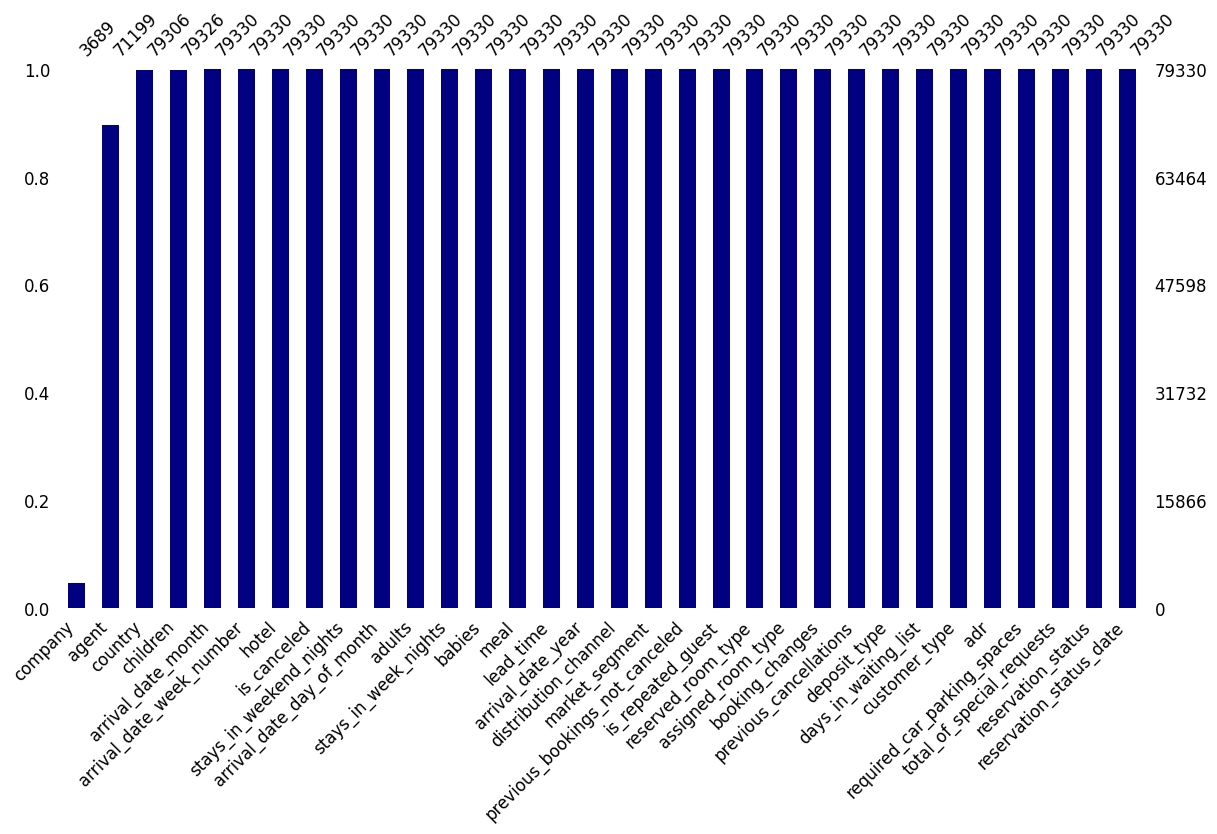

In [1816]:
missingno.bar(df_clean,color="navy", sort="ascending", figsize=(14,7), fontsize=12);

**Undefined Value**

In [1817]:
undefined = df_clean.apply(lambda col: (col.astype(str) == 'Undefined').sum())
undefined[undefined > 0]

market_segment          2
distribution_channel    4
dtype: int64

Terdapat 4 fitur yang memiliki missing value dan 2 fitur yang memiliki undefined value, antara lain:
- **company & agent** : Walaupun terdapat banyak missing value dari kedua fitur ini, kita tidak perlu memikirkan lebih lanjut karena nantinya kedua fitur ini akan kita hapus dikarenakan kedua fitur ini hanya berisi id unik dan tidak terpakai untuk analisa dan pengembangan model prediktif
- **country & children** : Karena missing value pada kedua fitur ini tergolong kecil, diputuskan untuk menghapus baris yang terkandung missing value pada kedua fitur ini
- **market_segment & distribution_channel** : Sama hal nya seperti **country & children**, baris pada kedua fitur ini akan di hapus karena jumlahnya kecil

In [1818]:
df_clean.drop(columns=['agent','company'], inplace=True)
df_clean.dropna(axis=0, inplace=True)
df_clean.drop(df_clean[(df_clean['market_segment'] == 'Undefined') | (df_clean['distribution_channel'] == 'Undefined')].index, inplace=True)
print(f'Jumlah baris setelah baris yang terkandung "missing value" dan "undefined value" dihapus : {df_clean.shape[0]}')

Jumlah baris setelah baris yang terkandung "missing value" dan "undefined value" dihapus : 79302


#### **Handling Duplicate**

In [1819]:
duplicate = df_clean.duplicated()
print(f'Terdapat {duplicate.sum()} ({round(duplicate.sum() / df_clean.shape[0] * 100, 2)}%) baris duplikat dari total {df_clean.shape[0]} data')

Terdapat 25898 (32.66%) baris duplikat dari total 79302 data


Keberadaan data duplikat dapat berdampak negatif pada model machine learning, karena memberikan bobot berlebih pada data yang sama, sehingga meningkatkan risiko **overfitting**. Hal ini membuat model lebih sulit untuk digeneralisasi dan kurang efektif dalam menangani data baru. Dengan menghapus data duplikat, ukuran dataset menjadi lebih representatif, meningkatkan akurasi model, dan memperbesar peluang model membuat prediksi yang lebih baik pada data yang belum pernah ditemui sebelumnya. Oleh karena itu, sebesar **32.67%** baris duplikat akan dihapus.

Sumber: https://medium.com/@anishnama20/how-duplicate-entries-in-data-set-leads-to-ovetfitting-2e3376e309c5 

In [1820]:
df_clean.drop_duplicates(inplace=True)
print(f'Jumlah baris setelah baris duplikat dihapus : {df_clean.shape[0]}')

Jumlah baris setelah baris duplikat dihapus : 53404


#### **Handling Outliers**

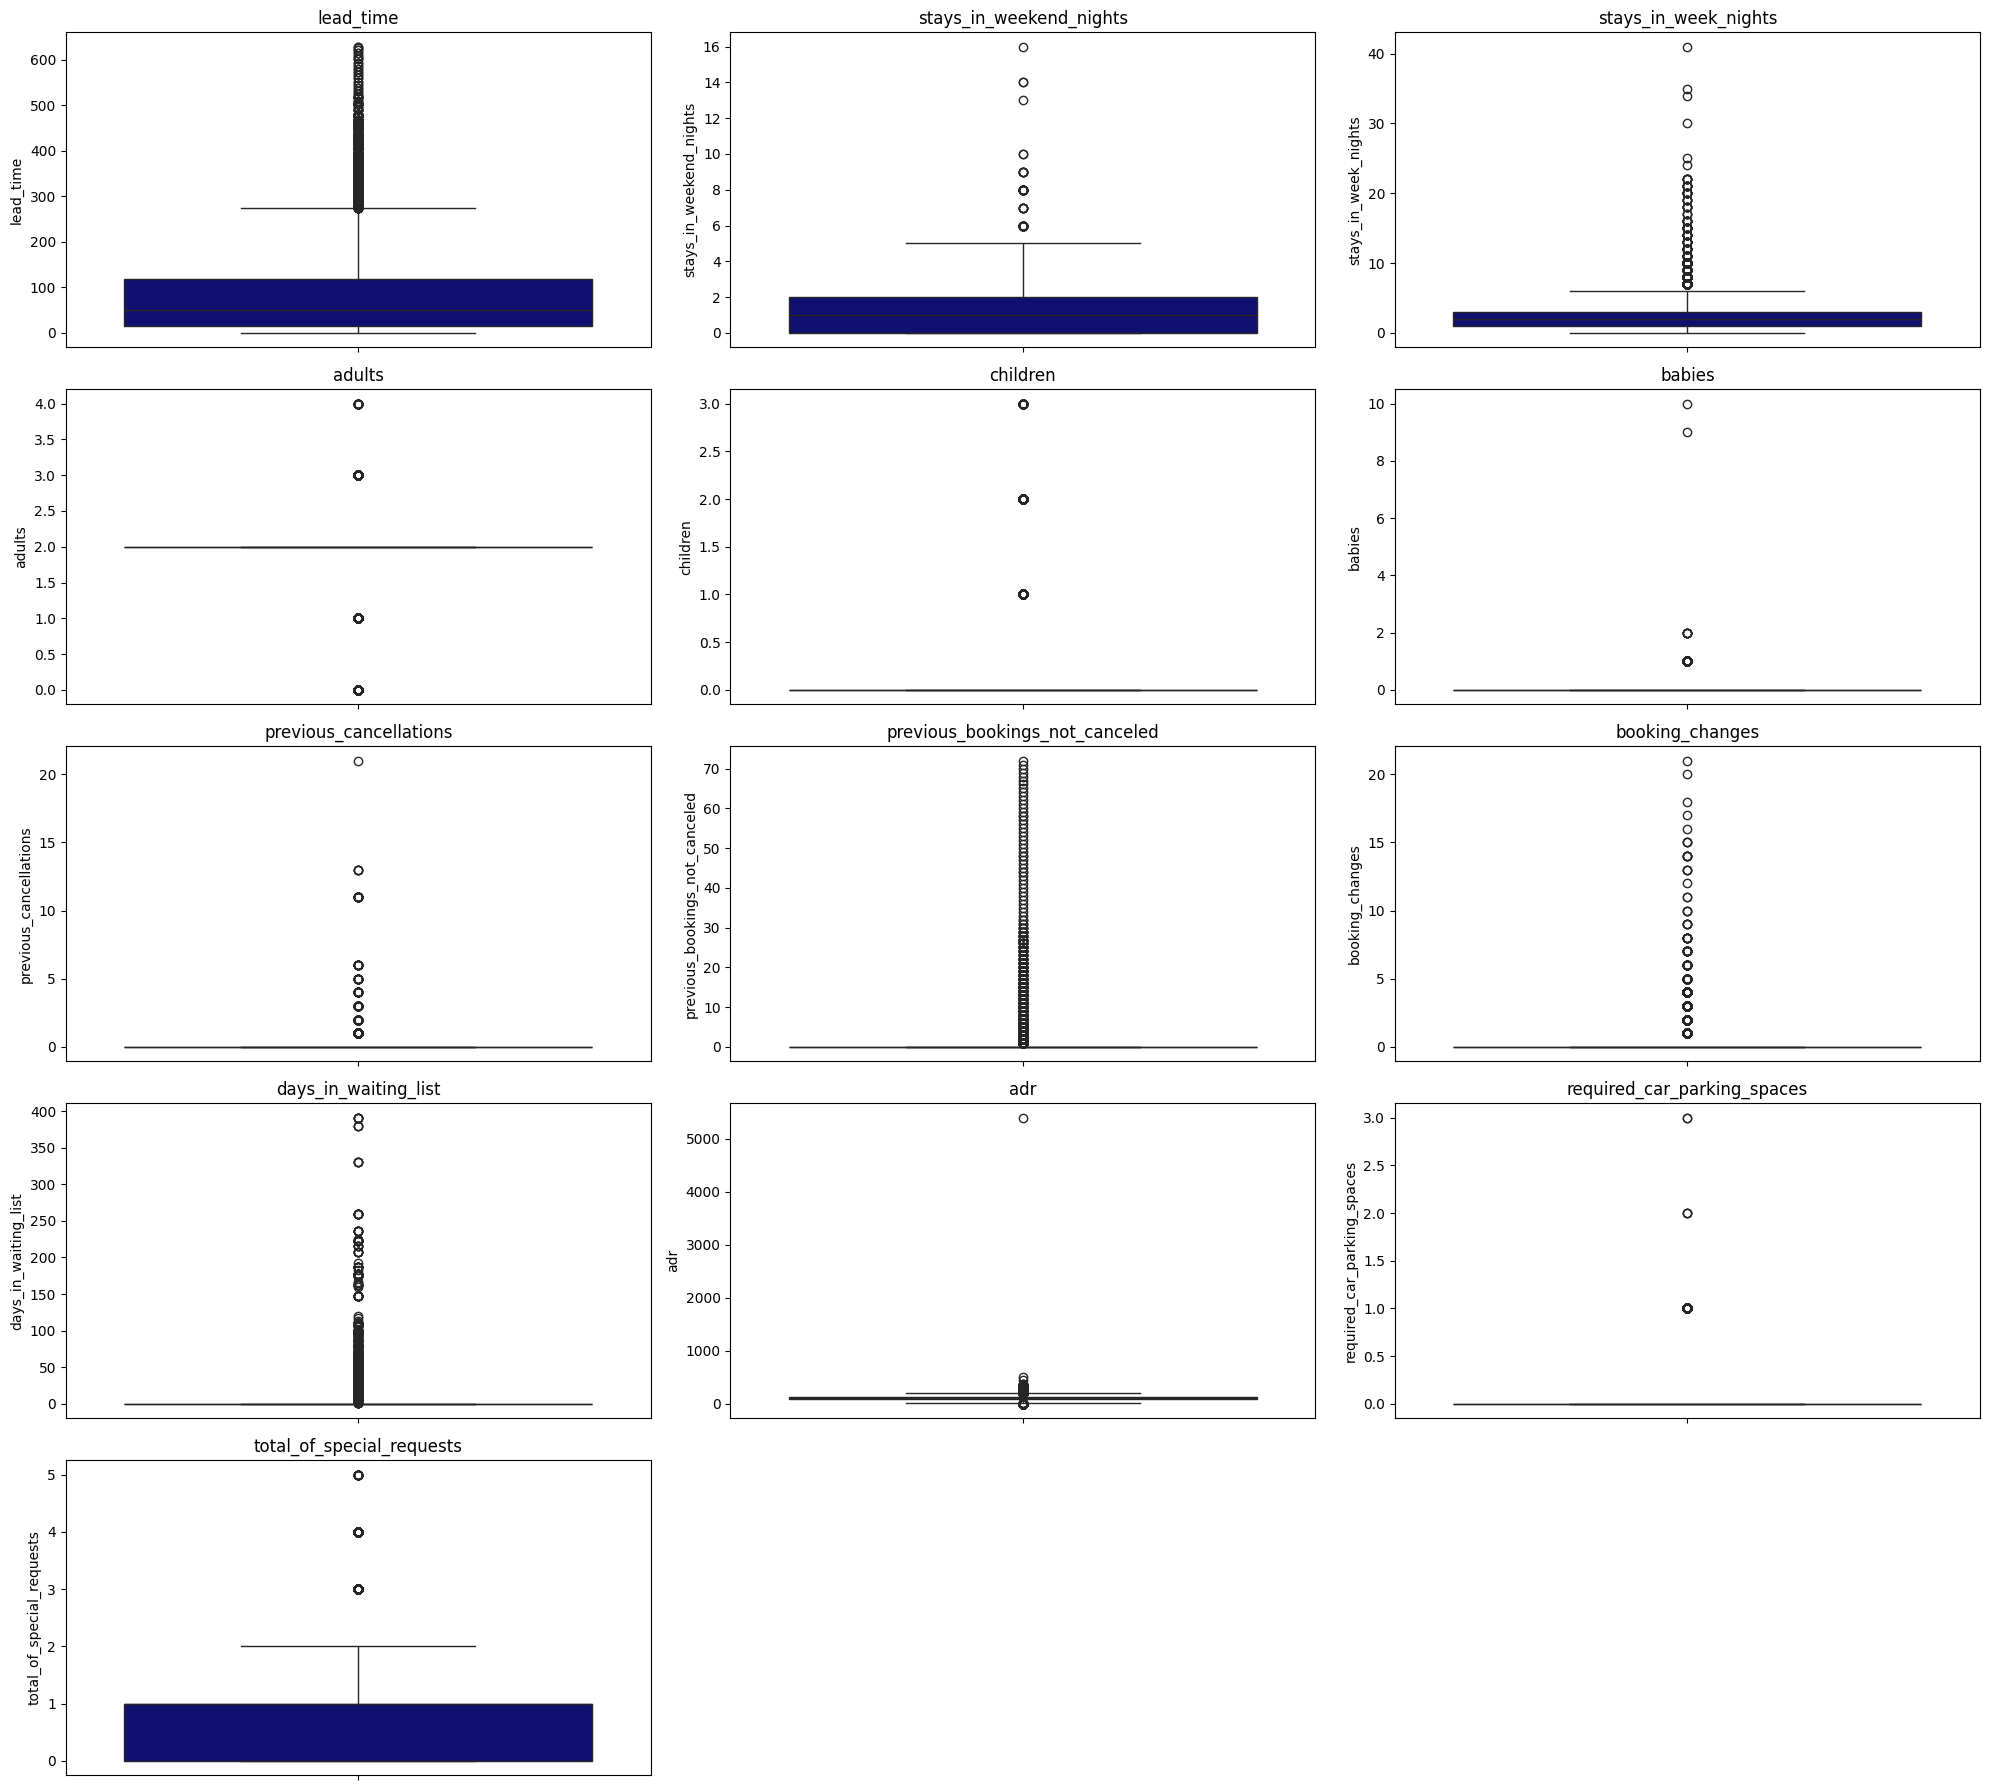

In [1821]:
num_cols = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
    'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
    'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests'
]

fig, axs = plt.subplots(5, 3, figsize=(20, 18))
axs = axs.flatten()

for i, data in enumerate(num_cols):
    sns.boxplot(data=df_clean[data], ax=axs[i], color="navy")
    axs[i].set_title(data)

for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [1822]:
def CheckOutliers(df_clean, col):
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    
    outliers = df_clean[(df_clean[col] < lower_fence) | (df_clean[col] > upper_fence)]
    
    results_df = pd.DataFrame({
        "Q1": [Q1],
        "Q3": [Q3],
        "IQR": [IQR],
        "Lower Fence": [lower_fence],
        "Upper Fence": [upper_fence],
        "Min Value" : [min(df_clean[col])],
        "Max Value" : [max(df_clean[col])],
        "Outliers Sum" : [len(outliers)],
        "Outliers Percentage": [round((len(outliers) / len(df_clean)) * 100, 2)]
    })

    return results_df

def PopulateOutliers(df_clean):
    numeric_cols = df_clean.select_dtypes(include='number').columns
    
    all_results = pd.DataFrame()
    
    for col in numeric_cols:
        result_df = CheckOutliers(df_clean, col)
        result_df.insert(0, 'Column', col)
        all_results = pd.concat([all_results, result_df], ignore_index=True)
    
    return all_results

PopulateOutliers(df_clean)

,Column,Q1,Q3,IQR,Lower Fence,Upper Fence,Min Value,Max Value,Outliers Sum,Outliers Percentage
0,is_canceled,0.0,1.0,1.0,-1.5,2.5,0.0,1.0,0,0.00
1,lead_time,14.0,118.0,104.0,-142.0,274.0,0.0,629.0,1696,3.18
2,arrival_date_year,2016.0,2017.0,1.0,2014.5,2018.5,2015.0,2017.0,0,0.00
3,arrival_date_week_number,16.0,37.0,21.0,-15.5,68.5,1.0,53.0,0,0.00
4,arrival_date_day_of_month,8.0,23.0,15.0,-14.5,45.5,1.0,31.0,0,0.00
5,stays_in_weekend_nights,0.0,2.0,2.0,-3.0,5.0,0.0,16.0,80,0.15
6,stays_in_week_nights,1.0,3.0,2.0,-2.0,6.0,0.0,41.0,686,1.28
7,adults,2.0,2.0,0.0,2.0,2.0,0.0,4.0,15426,28.89
8,children,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4937,9.24
9,babies,0.0,0.0,0.0,0.0,0.0,0.0,10.0,369,0.69


Berdasarkan boxplot dan table diatas, dapat disimpulkan:

1. **lead_time (3.18%)**
    - Sebagian besar data berada dalam rentang normal (0–274), tetapi ada outlier dengan nilai di atas 274 yang akan dianalisis lebih lanjut
    - Artinya, sebagian kecil pelanggan yang melakukan pemesanan sangat jauh dari tanggal menginap
2. **stays_in_weekend_nights (0.15%)**
    - Outliers pada fitur sangat kecil, yang menandakan sebagian kecil pelanggan memesan kamar untuk malam akhir pekan dalam jumlah yang lebih lama dari kebanyakan pelanggan lain
3. **stays_in_week_nights (1.28%)**
    - Ada sebagian kecil pelanggan melakukan pemesanan dengan jumlah malam yang jauh lebih tinggi dari biasanya. Ini bisa mencerminkan pelanggan yang menginap dalam waktu lama (long-stay guests)
4. **adults (28.89%)**
    - Lebih serperempat data pemesesanan untuk orang dewasa pada fitur ini dianggap sebagai outlier
    - walaupun secara persentase cukup besar, outlier pada fitur ini tergolong normal karena nilai maksimum adalah 4 orang dewasa. Untuk ukuran kamar hotel jumlah ini cukup masuk akal
5. **children (9.24%)**
    - Jumlah maksimum anak-anak yang ada pada dataset ini juga masih masuk akal (3 orang anak) karena bisa saja pelanggan yang memesan untuk sebuah keluarga dengan banyak anak
6. **babies (0.69%)**
    - Walaupun outlier pada fitur ini tergolong kecil, perlu di analisa kembali karena nilai maksimumnya adalah 10 bayi
7. **previous_cancellations (2.21%)**
    - Beberapa pelanggan memiliki riwayat pembatalan yang sangat tinggi, nilainya sampai 21 kali pembatalan
8. **previous_bookings_not_canceled (2.87%)**
    - Beberapa pelanggan memiliki banyak riwayat pemesanan sebelumnya yang tidak dibatalkan, ini menandakan bahwa sebagian kecil adalah pelanggan loyal
9. **booking_changes (16.56%)**
    - Persentase outlier pada fitur ini cukup besar, menunjukkan ada beberapa tamu yang sering mengubah pemesanannya berkali-kali
10. **days_in_waiting_list (1.34%)**
    - Outlier pada fitur ini menunjukkan adanya sebagian kecil pelanggan yang bersedia untuk menunggu lebih lama untuk mendapatkan kamar
    - Fitur ini akan kita hapus karena hampir keseluruhan datanya (98.66%) berisi value 0, yang dimana data pada fitur ini tidak bervariasi dan tidak relevan untuk membangun model prediktif kita
11. **adr (4.66%)**
    - Outlier pada fitur ini menunjukkan adanya sebagian data tarif harian rata-rata berada di bawah dan di atas rentang normal, ini akan dianalisis lebih lanjut
12. **required_car_parking_spaces (3.55%)**
    - Walaupun outlier pada fitur ini tergolong kecil, akan tetapi jika diperhatikan beberapa pelanggan memerlukan tempat parkir lebih dari semestinya (3 tempat parkir). Ini perlu di analisa kembali apakah data ini normal atau tidak
13. **total_of_special_requests (3.14%)**
    - Beberapa pelanggan memiliki banyak permintaan khusus yang jauh di atas rata-rata dibandingkan dengan pelanggan lain

Outliers pada sebagian besar fitur diatas tidak kita analisa lebih lanjut, karena nilai-nilai diluar rentang batas atas dirasa cukup masuk akal. Akan tetapi, tedapat 4 fitur yang menjadi perhatian khusus, yaitu **leadtime**, **babies**, **adr** dan **required_car_parking_spaces** yang dimana kedua fitur ini akan kita analisa lebih lanjut.    

#### **Handling Anomaly Data**

**1. Cek apakah ada anomali data dengan kondisi tidak cancel tetapi status reservasinya adalah Check-Out dan juga sebaliknya**

In [1823]:
print(df_clean[(df_clean['is_canceled'] == 1) & (df_clean['reservation_status'] == 'Check-Out')].shape[0])
print(df_clean[(df_clean['is_canceled'] == 0) & ((df_clean['reservation_status'] == 'Canceled') | (df_clean['reservation_status'] == 'No-Show'))].shape[0])

0
0


**2. lead_time**

In [1824]:
df_clean[df_clean['lead_time'] > 355].shape[0]

435

Lead time adalah jumlah hari antara tanggal pemesanan dan tanggal kedatangan, terdapat sebagian kecil pelanggan menunggu di waktu yang cukup lama (lebih dari 1 tahun). Pada fitur ini kita akan membatasi outlier yang nilainya lebih dari 1 tahun (365 hari) karena rasanya terlalu lama menunggu dalam jangka waktu lebih dari satu tahun. Ini akan menjadi limitasi project kita.

In [1825]:
df_clean = df_clean[df_clean['lead_time'] < 366]
df_clean.shape[0]

53028

**3. adults**

In [1826]:
df_clean[df_clean['adults'] < 1].shape[0]

368

Berdasarkan pengecekan diatas terdapat 370 baris data yang mengindikasikan pemesanan tanpa orang dewasa, ini bisa terjadi karena terdapat anak-anak/babies yang menginap tanpa didampingi orang tua dan ada juga baris data yang tidak ada nilai diantara 3 fitur (adults, children dan babies), yang mengindikasikan tidak ada yang menginap. Data ini akan kita hapus

In [1827]:
df_clean = df_clean[df_clean['adults'] > 0]
df_clean.shape[0]

52660

**4. babies**

In [1828]:
df_clean[df_clean['babies'] > 1][['adults', 'children', 'babies']].reset_index(drop=True)

,adults,children,babies
0,2,0.0,10
1,1,0.0,9
2,2,1.0,2
3,2,1.0,2
4,2,0.0,2
5,2,0.0,2
6,2,0.0,2
7,2,1.0,2


Dari diatas terlihat cukup normal, tidak ada yang perlu di handle karena sudah terhapus pada proses pengecekkan data adults.

**5. adr**

In [1829]:
df_clean.sort_values(by='adr', ascending=False).head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,0,Transient,5400.00,0,0,Canceled,2016-02-19
111403,City Hotel,0,0,2017,May,19,9,0,1,1,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,G,0,No Deposit,0,Transient,510.00,0,0,Check-Out,2017-05-10
103912,City Hotel,0,81,2016,December,53,31,1,1,2,2.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,1,No Deposit,0,Transient-Party,451.50,0,4,Check-Out,2017-01-02
103789,City Hotel,0,21,2016,December,53,30,0,2,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,375.50,0,0,Check-Out,2017-01-01
118515,City Hotel,0,14,2017,August,33,18,1,2,3,2.0,0,HB,ESP,Direct,Direct,0,0,0,G,G,1,No Deposit,0,Transient,372.33,0,1,Check-Out,2017-08-21


Nilai Average Daily Rate pada Baris paling pertama menunjukkan nilai yang tidak normal. Dari sekian banyak data hanya 1 baris ini yang memiliki nilai adr yang sangat signifikan dibandinkan dengan lainnya. Kemungkinan ini disebabkan oleh kesalahan input jadi akan kita hapus 1 baris ini

In [1830]:
df_clean[df_clean['adr'] < 1].shape[0]

937

In [1831]:
df_adr = df_clean[df_clean['adr'] < 1]
df_adr['market_segment'].value_counts()

market_segment
Complementary    466
Offline TA/TO    134
Online TA        123
Groups           102
Direct            88
Corporate         20
Aviation           4
Name: count, dtype: int64

Dari hasil pengecekan diatas terdapat nilai 0 pada fitur adr(tarif harian rata-rata). Jika di periksa lebih lanjut hampir sebagian besar berasal dari Complementary dimana pemesanan gratis atau diberikan sebagai kompensasi, misalnya untuk tamu VIP atau bagian dari promosi. [source](https://www.traveloka.com/id-id/explore/destination/macam-macam-status-kamar-hotel-acc/428326)

Meskipun penjelasan tersebut logis, secara operasional nilai adr = 0 tidak mencerminkan tarif harian aktual dan tidak valid untuk analisis. Oleh karena itu, nilai adr = 0 akan dihapus dari dataset untuk menjaga integritas analisis dan akurasi model.

In [1832]:
df_clean = df_clean[(df_clean['adr'] < 5400) & (df_clean['adr'] >= 1)]
df_clean.shape[0]

51722

**6. required_car_parking_spaces**

In [1833]:
df_clean[df_clean['required_car_parking_spaces'] > 1][['adults', 'children', 'babies', 'required_car_parking_spaces']].reset_index(drop=True)

,adults,children,babies,required_car_parking_spaces
0,2,1.0,0,2
1,1,0.0,0,3
2,2,0.0,0,3
3,3,0.0,1,2
4,3,0.0,0,2


Umumnya sebuah keluarga kecil hanya memerlukan 1 mobil untuk menampung keluarganya (asumsi 4 orang untuk satu mobil kecil). Data diatas bisa dianggap normal jika pelanggan memesan tempat parkir lebih untuk tamu lain yang akan datang belakangan (keluarga atau rekan bisnis). Akan tetapi, terdapat data yang harus dihapus karena pelanggan membutuhkan tempat parkir yang melebihi jumlah orang yang akan menginap di hotel

In [1834]:
df_clean = df_clean[df_clean['required_car_parking_spaces'] <= 2]
print(f'Jumlah baris setelah dataset di cleaning : {df_clean.shape[0]} baris')

Jumlah baris setelah dataset di cleaning : 51720 baris


#### **Penambahan fitur baru, Binning dan Recategorize**

Penambahan fitur baru **length_of_stay** yang didapat dari hasil penggabungan dua fitur (**stays_in_weekend_nights** dan **stays_in_week_nights**), fitur ini menginformasikan berapa lama waktu yang dipesan untuk menginap. Fitur ini akan dilakukan juga proses binning untuk membuat klasifikasi berdasarkan lama waktu yang dipesan untuk menginap.

Berdasarkan [roof264.com](https://roof264.com/classification-of-hotels-by-length-of-guest-stay), berikut klasifikasi berdasarkan lama menginap di hotel :
1. Temporary Hotel (≤ 1 hari)
2. Commercial Hotel (2–7 hari)
3. Extended Stay Hotel (8–14 hari)
4. Semi-residential Hotel (15–29 hari)
5. Residence/Apartment Hotel (≥ 30 hari)

In [1835]:
df_clean['length_of_stay'] = df_clean["stays_in_weekend_nights"] + df_clean["stays_in_week_nights"]

def categorize_stay(nights):
    if nights <= 1:
        return "Temporary Hotel"
    elif nights <= 7:
        return "Commercial Hotel"
    elif nights <= 14:
        return "Extended Stay Hotel"
    elif nights <= 29:
        return "Semi-residential Hotel"
    else:
        return "Residence/Apartment Hotel"

df_clean['stay_category'] = df_clean['length_of_stay'].apply(categorize_stay)

df_clean['stay_category'].value_counts()

stay_category
Commercial Hotel             40794
Temporary Hotel               9781
Extended Stay Hotel            999
Semi-residential Hotel         136
Residence/Apartment Hotel       10
Name: count, dtype: int64

Melakukan penyesuaian room type berdasarkan [kualitas kamar](https://sanhotelseries.com/hotel-room-classification-a-complete-guide/) (**Standard**, **Superior**, **Deluxe**, dan **Suite**) yang dihasilkan dari fitur **assigned_room_type** dengan memperhatikan rata-rata dari fitur **adr**

In [1836]:
df_clean.groupby('assigned_room_type')['adr'].mean().sort_values()

assigned_room_type
B    100.423848
A    101.332590
C    110.101888
K    110.613500
D    125.373067
E    147.797005
F    184.277681
G    202.485223
Name: adr, dtype: float64

In [1837]:
def replace_room_type(df_clean):
    mapping = {
        'A': 'Standard',
        'B': 'Standard',
        'C': 'Superior',
        'K': 'Superior',
        'D': 'Deluxe',
        'E': 'Deluxe',
        'F': 'Suite',
        'G': 'Suite'
    }

    df_clean['assigned_room_type'] = df_clean['assigned_room_type'].replace(mapping)
    df_clean['reserved_room_type'] = df_clean['reserved_room_type'].replace(mapping)

    return df_clean

df_clean = replace_room_type(df_clean)

**Pengecekan Distribusi Data**

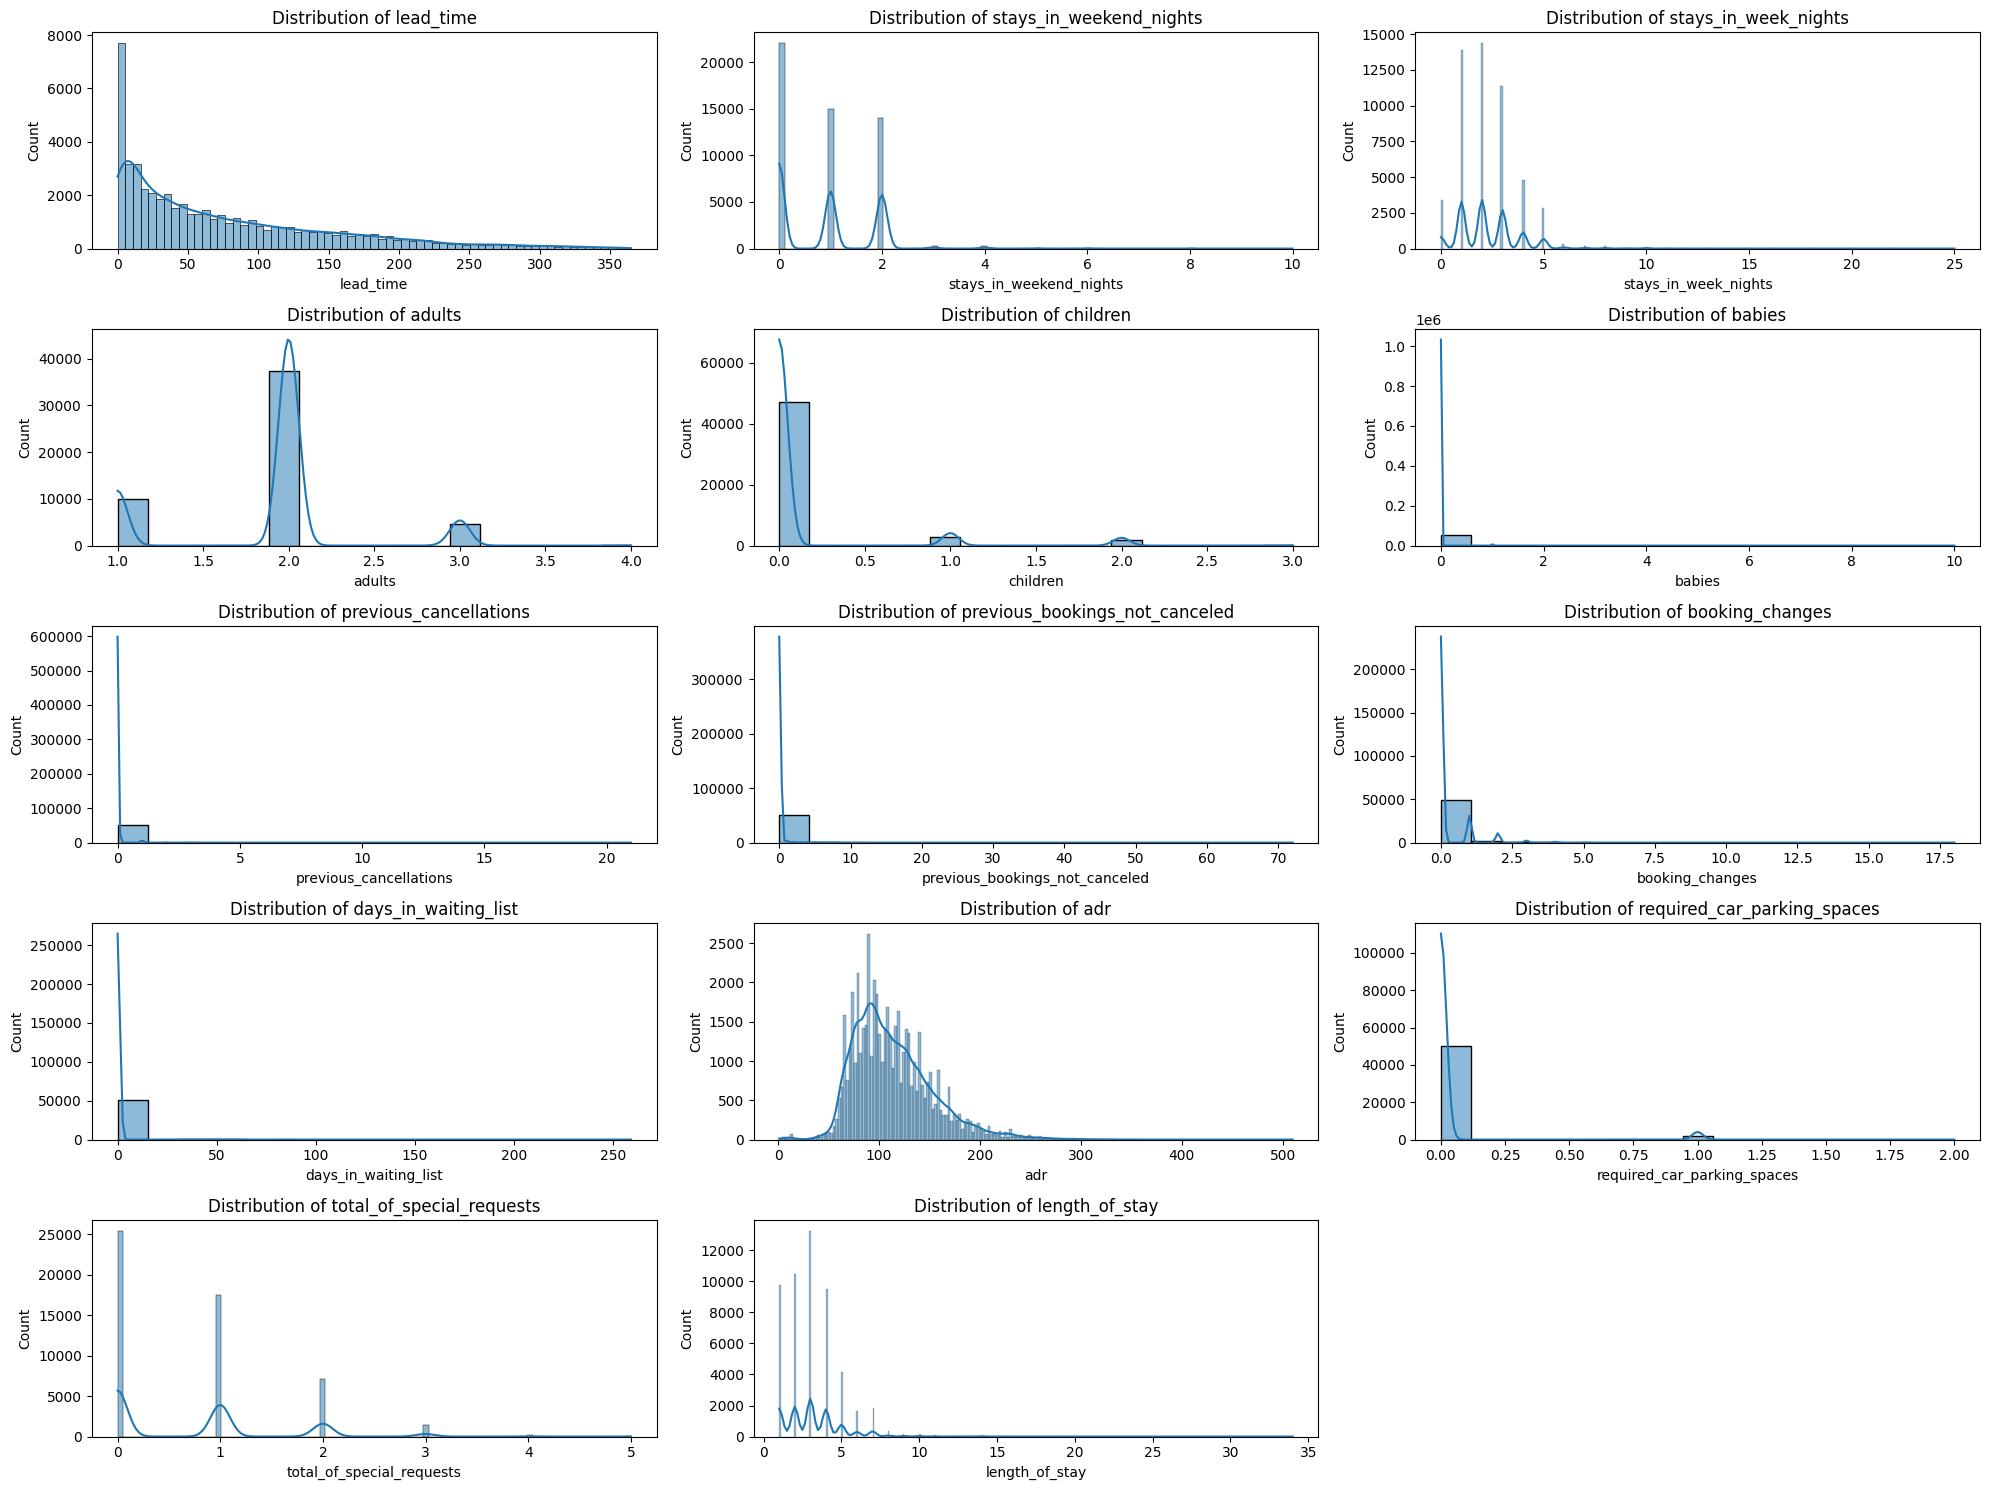

In [1838]:
# Memilih kolom numerik, kecuali yang ingin dikecualikan
exclude_cols = ['is_canceled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest']
numeric_cols = df_clean.select_dtypes(include='number').drop(columns=exclude_cols, errors='ignore')

# Membuat subplots dengan ukuran 6x3
fig, axes = plt.subplots(5, 3, figsize=(20, 15))
axes = axes.flatten()  # Mengubah axes menjadi array 1D untuk iterasi yang lebih mudah

# Memplot histogram untuk setiap kolom numerik yang tersisa
for i, column in enumerate(numeric_cols):
    sns.histplot(numeric_cols[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

    
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

Berdasarkan histogram diatas, terlihat jelas bahwa semua variabel tidak terdistribusi normal. Untuk analisis korelasi menggunakan Spearman sebagai metode korelasi dapat memberikan wawasan yang lebih akurat tentang hubungan antar variabel.

#### **Clean Dataset**

In [1839]:
display(df_clean.head(), df_clean.tail())
display(df_clean.info())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,length_of_stay,stay_category
40061,City Hotel,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,Standard,Standard,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-07-01,4,Commercial Hotel
40062,City Hotel,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,Standard,Standard,0,No Deposit,0,Transient,68.0,0,1,Canceled,2015-04-30,4,Commercial Hotel
40063,City Hotel,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,Standard,Standard,0,No Deposit,0,Transient,76.5,0,2,Canceled,2015-06-23,6,Commercial Hotel
40064,City Hotel,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,Standard,Standard,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-04-02,2,Commercial Hotel
40065,City Hotel,1,79,2015,July,27,2,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,Standard,Standard,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-06-25,3,Commercial Hotel


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,length_of_stay,stay_category
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,Standard,Standard,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,Commercial Hotel
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,Deluxe,Deluxe,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,Commercial Hotel
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,Deluxe,Deluxe,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,Commercial Hotel
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,Standard,Standard,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,Commercial Hotel
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,Standard,Standard,0,No Deposit,0,Transient,151.20,0,2,Check-Out,2017-09-07,9,Extended Stay Hotel


<class 'pandas.core.frame.DataFrame'>
Index: 51720 entries, 40061 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           51720 non-null  object 
 1   is_canceled                     51720 non-null  int64  
 2   lead_time                       51720 non-null  int64  
 3   arrival_date_year               51720 non-null  int64  
 4   arrival_date_month              51720 non-null  object 
 5   arrival_date_week_number        51720 non-null  int64  
 6   arrival_date_day_of_month       51720 non-null  int64  
 7   stays_in_weekend_nights         51720 non-null  int64  
 8   stays_in_week_nights            51720 non-null  int64  
 9   adults                          51720 non-null  int64  
 10  children                        51720 non-null  float64
 11  babies                          51720 non-null  int64  
 12  meal                            

None

In [1840]:
## simpan dataset untuk dashboard tableau
# df_clean.to_excel('hotel_bookings_clean.xlsx', index=False)

## **4. Data Analysis**

In [1841]:
df_clean['is_canceled'].value_counts()

is_canceled
0    36060
1    15660
Name: count, dtype: int64

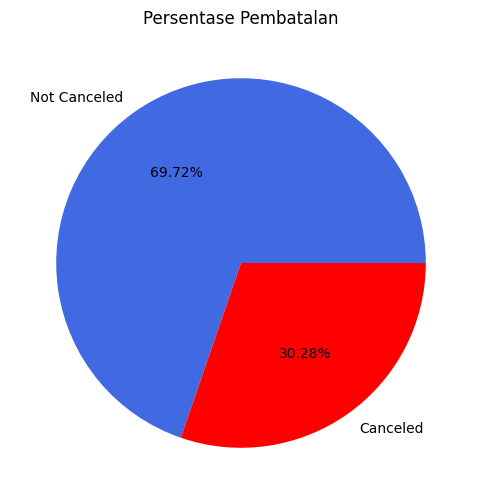

In [1842]:
plt.figure(figsize=(6, 6))
plt.pie(df_clean['is_canceled'].value_counts(), labels=['Not Canceled', 'Canceled'], autopct='%1.2f%%', colors=['royalblue', 'red'])
plt.title("Persentase Pembatalan")
plt.show()

- Persentase dari tamu yang tidak membatalkan reservasi adalah 69.72% sedangkan Persentase untuk tamu yang membatalkan reservasi adalah 30.28%.
- Jika di lihat dari Persentase pembatalan yang berada di angka 30.28%, pembatalan di hotel ini terbilang cukup tinggi. Hal ini menjadi masalah karena secara global, rata-rata tingkat pembatalan pemesanan hotel sekitar 20%.
[Source](https://webrezpro-com.translate.goog/hospitality-by-the-numbers-40-stats-you-should-know/?_x_tr_sl=en&_x_tr_tl=id&_x_tr_hl=id&_x_tr_pto=sge#:~:text=Globally%2C%20the%20average%20hotel%20booking,compared%20to%2025%25%20in%202021.)

In [1843]:
df_no_cancel = df_clean[df_clean['is_canceled'] == 0]
df_cancel = df_clean[df_clean['is_canceled'] == 1]

#### **lead_time**

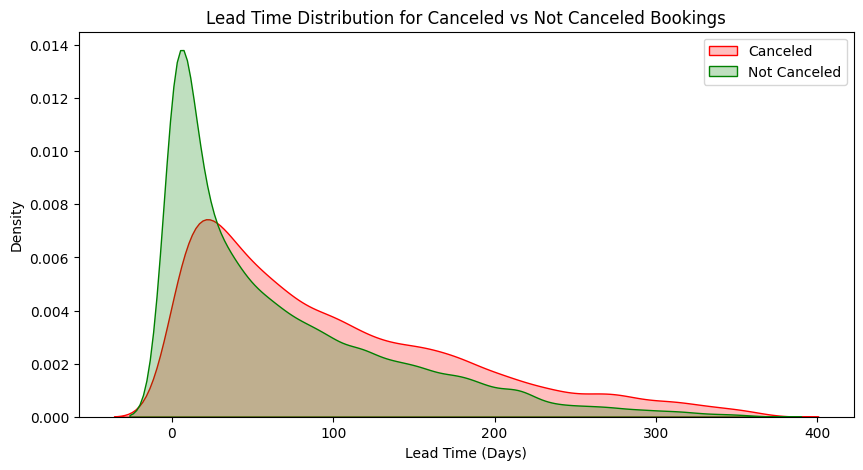

In [1844]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_clean[df_clean['is_canceled'] == 1]['lead_time'], label='Canceled', shade=True, color='red')
sns.kdeplot(df_clean[df_clean['is_canceled'] == 0]['lead_time'], label='Not Canceled', shade=True, color='green')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Density')
plt.title('Lead Time Distribution for Canceled vs Not Canceled Bookings')
plt.legend()
plt.show()

**Insight**

Jika dilihat dari KDE Plot diatas, dapat disimpulkan bahwa :
- Mayoritas pemesanan memiliki lead time pendek (dibawah 50 hari)
- kurva merah lebih landai dibandingkan kurva hijau, artinya pemesanan yang dibatalkan tersebar dalam berbagai lead time. tetapi lebih dominan pada lead time panjang
- kurva hijau lebih terkonsenstrasi pada lead time pendek, artinya pemesanan yang tidak dibatalkan cenderung dilakukan dalam waktu dekat sebelum tanggal menginap
- pada satu titik ketika melewati lead time 25 hari, cancel lebih tinggi dibandingkan dengan not canceled. kemudian seterusnya cancel selalu lebih tinggi dibandingkan not cancelednya.

**Recommendation**

Untuk mengurangi pembatalan oleh tamu yang memiliki lead time diatas 25 hari, kita bisa merekomendasikan pihak hotel untuk membuat penawaran khusus bagi para tamu yang memiliki lead time diatas 25 hari. Seperti memberi voucher potongan harga untuk upgrade kamar atau juga bisa voucher makan bagi tamu yang melakukan reservasi dengan lead time diatas 25 hari dengan beberapa ketentuan tambahan.

**Action**

Voucher hanya diberikan untuk tamu dengan lead time lebih dari 25 hari, voucher yang di sediakan :
- Voucher diskon upgrade kamar sebesar 12% s/d €14.10 dengan minimal kamar yang di pesan adalah kamar Superior
- Khusus untuk tamu dari kamar Suite karena tidak bisa upgrade kamar maka bisa memilih 1 dari 2 voucher yang disediakan :
    1. Voucher makan sebesar 10% bisa pilih lunch atau dinner (tidak termasuk minuman/wine)
    2. Voucher spa 12% untuk 1x pemakaian

#### **arrival_date_month**

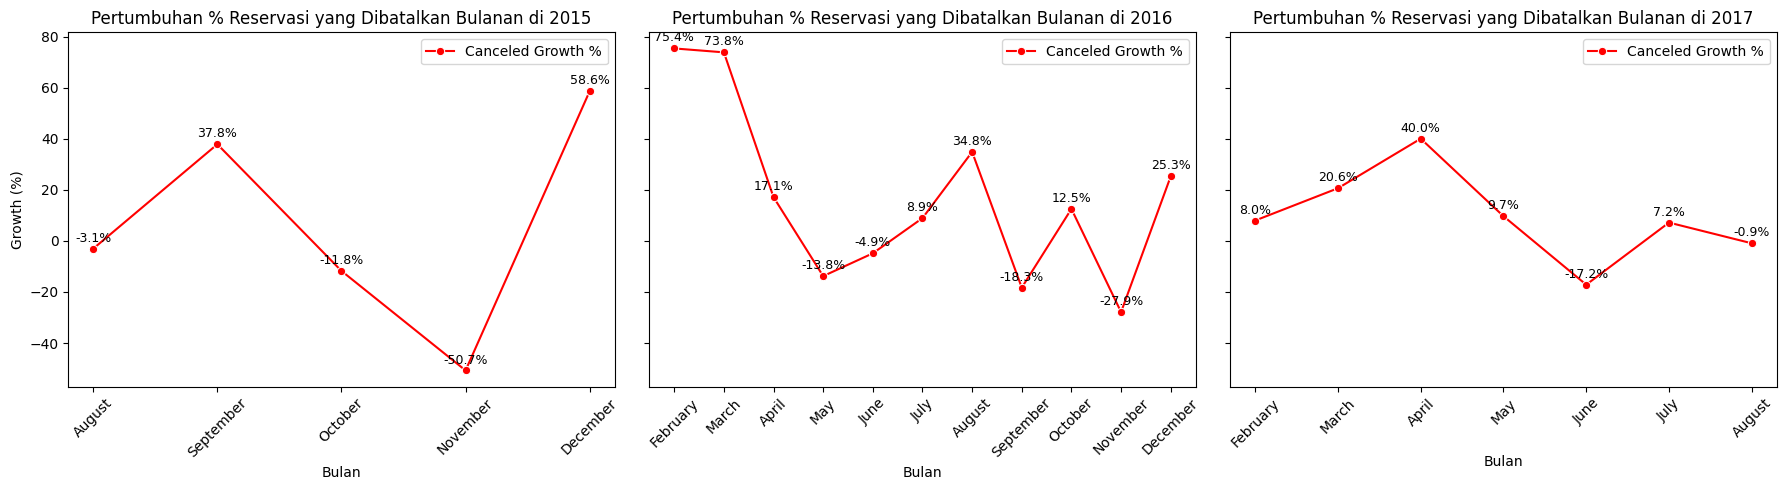

In [1845]:
# Definisikan urutan bulan agar ditampilkan secara kronologis
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Agregasi jumlah reservasi per bulan per tahun
monthly_counts = df_clean.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='reservations')
monthly_cancel_counts = df_cancel.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='reservations')

# Ubah 'arrival_date_month' menjadi kategori dengan urutan yang ditentukan
monthly_counts['arrival_date_month'] = pd.Categorical(monthly_counts['arrival_date_month'], categories=month_order, ordered=True)
monthly_cancel_counts['arrival_date_month'] = pd.Categorical(monthly_cancel_counts['arrival_date_month'], categories=month_order, ordered=True)

# Urutkan data berdasarkan tahun dan bulan
monthly_counts = monthly_counts.sort_values(['arrival_date_year', 'arrival_date_month'])
monthly_cancel_counts = monthly_cancel_counts.sort_values(['arrival_date_year', 'arrival_date_month'])

# Hitung pertumbuhan persentase (month-on-month growth) untuk total reservasi dan reservasi yang dibatalkan
monthly_counts['growth_pct'] = monthly_counts.groupby('arrival_date_year')['reservations'].pct_change() * 100
monthly_cancel_counts['growth_pct'] = monthly_cancel_counts.groupby('arrival_date_year')['reservations'].pct_change() * 100

# Buat subplot untuk masing-masing tahun
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
years = [2015, 2016, 2017]

for ax, year in zip(axes, years):
    # Filter data untuk tahun tertentu
    df_cancel_year = monthly_cancel_counts[monthly_cancel_counts['arrival_date_year'] == year]
    
    # Plot pertumbuhan persentase reservasi yang dibatalkan (merah)
    sns.lineplot(x='arrival_date_month', y='growth_pct', data=df_cancel_year, marker='o', ax=ax, color='red', label='Canceled Growth %')
    
    ax.set_title(f"Pertumbuhan % Reservasi yang Dibatalkan Bulanan di {year}")
    ax.set_xlabel("Bulan")
    ax.set_ylabel("Growth (%)")
    ax.tick_params(axis='x', rotation=45)
    ax.legend()
    
    # Tambahkan anotasi persentase di atas setiap titik untuk garis pembatalan
    for line in ax.get_lines():
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        for x, y in zip(xdata, ydata):
            if not np.isnan(y):
                ax.annotate(f"{y:.1f}%", (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

**Insight**

- Setiap tahun menunjukkan fluktuasi cukup tajam dari satu bulan ke bulan berikutnya (misalnya, ada lonjakan signifikan hingga di atas 50%, lalu turun ke kisaran belasan persen). Ini menandakan bahwa pembatalan reservasi oleh tamu tidak selalu stabil dan dipengaruhi oleh berbagai faktor (musiman, promosi, kondisi ekonomi, dll.)[[1]](https://myportugalholiday.com/).

**Recommendation**

Sehingga hotel perlu menerapkan strategi yang tidak hanya memaksimalkan pemesanan saat puncak musim liburan maupun tidak, tetapi juga mengurangi risiko pembatalan. seperti : 
1. Ketika sedang high season, harga per-kamar dinaikkan dengan menyesuaikan tingkat permintaan dan Ketersediaan Kamar. Sehingga pihak hotel bisa memberikan diskon cukup besar agar tamu tertarik untuk menginap. 
2. Ketika sedang low season, karena sepi maka cukup banyak pilihan hotel yang tersedia sehingga tamu bisa memilih alternatif hotel lain yang lebih menguntungkan bagi tamu [[2]](https://myportugalholiday.com/portugal-guides/portugal-in-february.html). Sehingga kamu menyarankan pihak hotel untuk membuat strategi Penawaran insentif seperti pemberian voucher(voucher diskon kamar, voucher makan atau juga voucher layanan fasilitas tertentu.)

**Action**

Hal yang harus di lakukan pihak hotel saat High Season :
1. Menaikkan harga kamar sebesar 30% dari harga asli kamar, hal ini di lakukan untuk bisa memberikan diskon besar pada tamu agar tamu merasa tertarik karena melihat perbedaan harga sebelum diskon dan sesudah diskon.
2. Memberikan Diskon sebesar 20% dari harga kamar yang sudah dinaikkan kepada para tamu, namun diskon ini diikuti dengan beberapa ketentuan, antara lain :
    - Tamu memesan langsung melalui website resmi hotel maupun datang langsung ke hotel.
    - Lama menginap tamu minimal 2 malam.
3. Memberikan Diskon sebesar 10% dari harga kamar yang sudah dinaikkan kepada para tamu khusus pemesanan melalui TA/TO, namun diskon ini diikuti dengan beberapa ketentuan, antara lain :
    - Lama menginap tamu minimal 2 malam.
    - Pemesanan dilakukan H-7 dari tanggal Check-In.

Hal yang harus di lakukan pihak hotel saat Low Season : 
1. Harga kamar tidak akan dinaikkan seperti saat High Season.
2. Buat promosi terbatas selama 1-2 minggu dengan memberikan diskon 20% dari harga asli kamar, namun dengan beberapa ketentuan, antara lain : 
    - Tamu memesan langsung melalui website resmi hotel maupun datang langsung ke hotel.
    - Lama menginap tamu minimal 2 malam.

#### **distribution_channel**

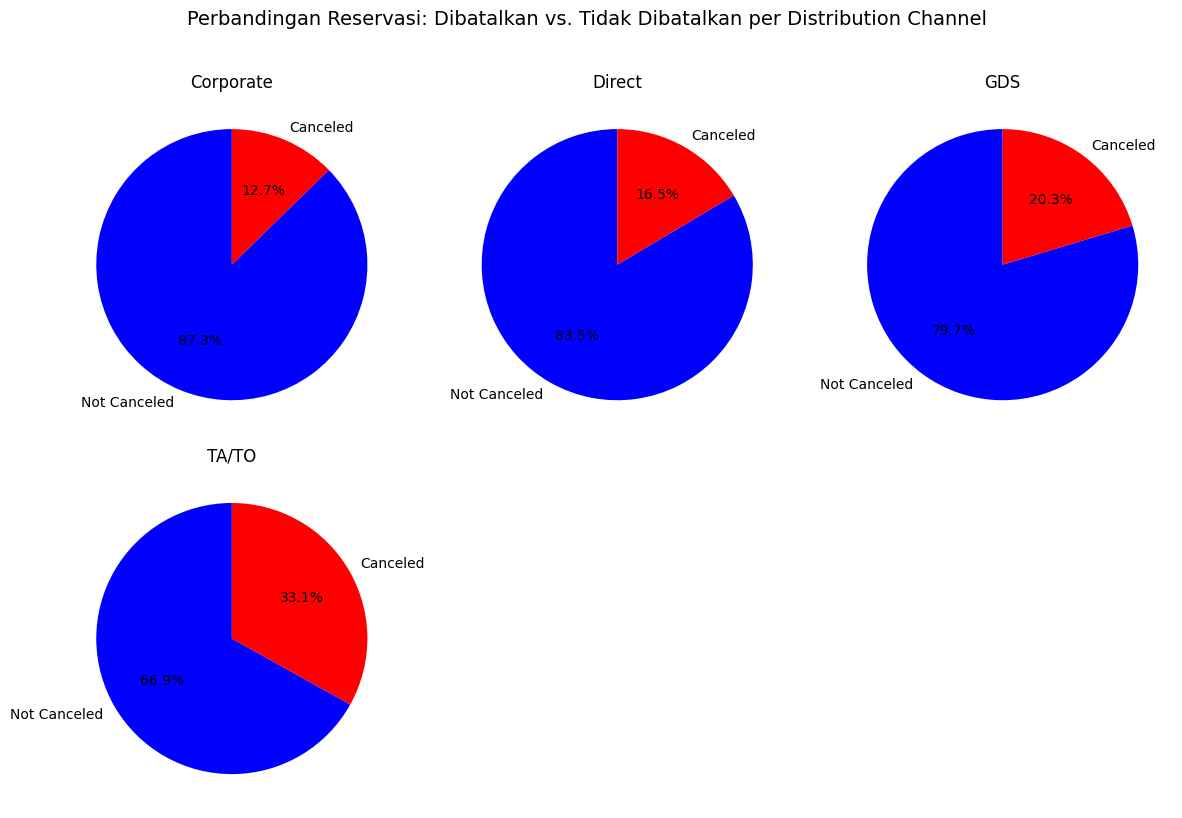

In [1846]:
import math

channel_data = df_clean.groupby(['distribution_channel', 'is_canceled']).size().reset_index(name='count')

channel_pivot = channel_data.pivot(index='distribution_channel', columns='is_canceled', values='count').fillna(0)
channel_pivot.columns = ['Not Canceled', 'Canceled']

num_channels = len(channel_pivot.index)

cols = 3
rows = math.ceil(num_channels / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*4))
axes = axes.flatten()

for i, channel in enumerate(channel_pivot.index):
    values = channel_pivot.loc[channel]
    axes[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
    axes[i].set_title(f"{channel}")
    
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Perbandingan Reservasi: Dibatalkan vs. Tidak Dibatalkan per Distribution Channel", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

**Insight**

Jika di lihat dari pie chart diatas, bisa kita ketahui bahwa Distribution Channel yang memiliki pembatalan reservasi paling banyak adalah TA/TO (Travel agent/tour operators) yaitu 33.1%. Kemudian GDS memiliki pembatalan yang cukup tinggi kedua yaitu 20.3%, dimana GDS merupakan platform teknologi dengan Travel Agent sebagai penggunanya.

**Recommendation**

- Dikarenakan kita tidak mengetahui kebijakan apa yang digunakan TA/TO serta GDS dalam pembatalan reservasi, maka kita perlu Menegosiasikan kebijakan pembatalan yang lebih ketat dengan TA/TO serta Menerapkan deposit atau pembayaran di muka untuk mengurangi pembatalan.
- Pihak hotel juga dapat meminta pihak TA/TO untuk mengumpulkan umpan balik dari tamu yang membatalkan reservasi melalui TA/TO untuk mengidentifikasi area yang perlu perbaikan.

**Action**

Hal yang di berlakukan untuk TA/TO serta GDS adalah :
1. Biaya Deposit minimal 60% untuk setiap kamar
2. Jika tamu membatalkan reservasi h-4 maka deposit hanya akan dikembalikan 70%
3. Jika tamu membatalkan reservasi h-3 maka deposit hanya akan dikembalikan 40%
4. Jika tamu membatalkan reservasi h-2 maka deposit akan hangus dan tidak bisa dikembalikan
5. Pihak TA/TO wajib meminta umpan balik dari tamu yang membatalkan reservasi

#### **is_repeated_guest**

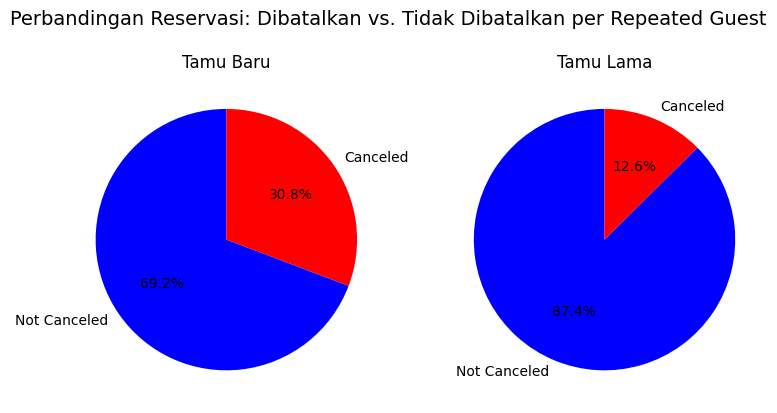

In [1847]:
repeat_data = df_clean.groupby(['is_repeated_guest', 'is_canceled']).size().reset_index(name='count')

repeat_pivot = repeat_data.pivot(index='is_repeated_guest', columns='is_canceled', values='count').fillna(0)
repeat_pivot.columns = ['Not Canceled', 'Canceled']

repeat_pivot.index = repeat_pivot.index.map({0: "Tamu Baru", 1: "Tamu Lama"})

num_repeat = len(repeat_pivot.index)

cols = 2
rows = math.ceil(num_repeat / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*4))
axes = axes.flatten()

for i, repeat in enumerate(repeat_pivot.index):
    values = repeat_pivot.loc[repeat]
    axes[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
    axes[i].set_title(f"{repeat}")
    
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Perbandingan Reservasi: Dibatalkan vs. Tidak Dibatalkan per Repeated Guest", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

**Insight**

Persentase tamu baru yang membatalkan reservasi adalah 30.8%, angka ini cukup tinggi dibandingkan tamu lama yang membatalkan reservasi yaitu 12.6%. Hal ini mungkin di sebabkan karena tamu baru belum begitu mengetahui fasilitas maupun pelayanan seperti apa yang diberikan oleh hotel, sedangkan tamu yang sudah pernah menginap pasti sudah mengetahui dengan baik fasilitas dan pelayanan apa yang di dapat sehingga pembatalan reservasi dari tamu yang sudah pernah menginap lebih sedikit.

**Recommendation**

maka dari itu kami merekomendasikan pihak hotel untuk melakukan strategi agar mengurangi pembatalan reservasi dari para tamu baru, seperti :
- Pastikan informasi mengenai fasilitas, layanan, dan keunggulan hotel tersaji dengan jelas pada platform promosi hotel.
- Tampilkan testimoni dari tamu-tamu yang pernah menginap sehingga tamu baru merasa lebih percaya dan yakin untuk melanjutkan reservasi mereka.

**Action**

Hal yang harus di lakukan pihak hotel :
1. Tim pemasaran harus memastikan kelengkapan informasi mengenai fasilitas, layanan, dan keunggulan hotel di website, email konfirmasi, dan materi pemasaran.
2. Pada website hotel/media sosial untuk promosi hotel perlu di tampilkan testimoni dari tamu-tamu yang pernah menginap seperti ulasan tamu, foto, atau video yang menggambarkan pengalaman menginap yang positif.
3. Berikan syarat pembatalan reservasi, dimana tamu wajib memberikan review atau alasan pembatalan.

#### **deposit_type**

In [1848]:
deposit_type_counts = df_cancel['deposit_type'].value_counts()
deposit_type_counts

deposit_type
No Deposit    14970
Non Refund      680
Refundable       10
Name: count, dtype: int64

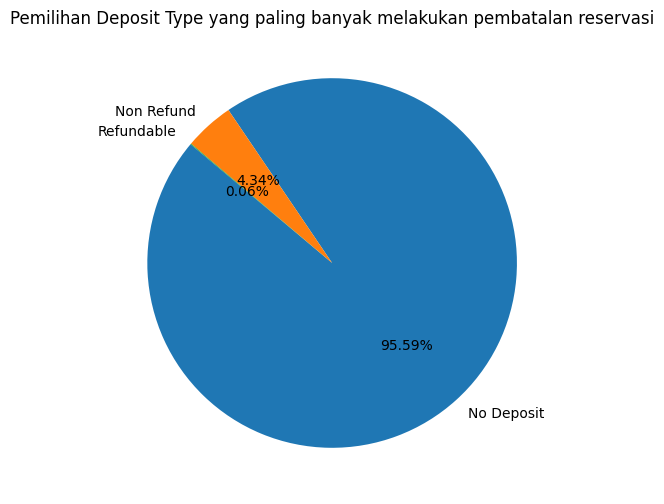

In [1849]:
plt.figure(figsize=(6, 6))
plt.pie(deposit_type_counts, labels=deposit_type_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Pemilihan Deposit Type yang paling banyak melakukan pembatalan reservasi')
plt.show()

**Insight**

- Tamu yang tidak memiliki deposit cenderung membatalkan reservasi dibandingkan tamu yang memilih Deposit Non Refund dan juga Refundable. hal itu di karenakan mereka tidak perlu memikirkan kerugian jika membatalkan reservasi karena tidak melakukan deposit, sehingga para tamu bisa dengan lebih mudah membatalkan reservasi jika memang menemukan pilihan hotel lain yang lebih baik ataupun lebih murah.
- Sedangkan tamu yang sudah memiliki deposit sebelumnya akan cenderung lebih memikirkan lagi jika ingin melakukan pembatalan reservasi. 

**Recommendation**

Karena Deposit membantu hotel memastikan pemesanan lebih stabil dan mengurangi kemungkinan adanya kamar kosong akibat pembatalan mendadak. Kami memberikan rekomendasi pada pihak hotel untuk mengubah kebijakan perihal deposit.

**Action**

Hal yang perlu diberlakukan oleh pihak hotel :
1. Pilihan untuk tidak melakukan deposit di tiadakan
2. Pihak hotel memberlakukan agar setiap tamu yang memesan kamar wajib memberikan deposit minimal 50%
3. Jika tamu membatalkan reservasi h-4 maka deposit hanya akan dikembalikan 60%
4. Jika tamu membatalkan reservasi h-3 maka deposit hanya akan dikembalikan 30%
5. Jika tamu membatalkan reservasi h-2 maka deposit akan hangus dan tidak bisa dikembalikan

**Pola pembatalan di City Hotel menunjukkan bahwa:**

- Reservasi dengan jangka waktu lead time yang panjang dan tanpa deposit memiliki risiko pembatalan yang tinggi.
- Volume pembatalan meningkat secara proporsional dengan lonjakan reservasi di musim liburan, terutama melalui channel TA/TO.
- Tamu baru secara signifikan lebih rentan membatalkan reservasi dibandingkan dengan tamu lama, yang menunjukkan perlunya strategi khusus untuk meningkatkan kepercayaan dan komitmen pemesanan di segmen tamu baru.

## **5. Data Preprocessing & Feature Engineering**

In [1850]:
df_model = df_clean.copy()

Setelah sebelumnya sudah dilakukan treatment terhadap missing value, duplikat value dan outliers. pada tahap ini kita akan mempersiapkan dataset untuk dipakai membangun model prediktif

**Pengecekan Korelasi Numerik**

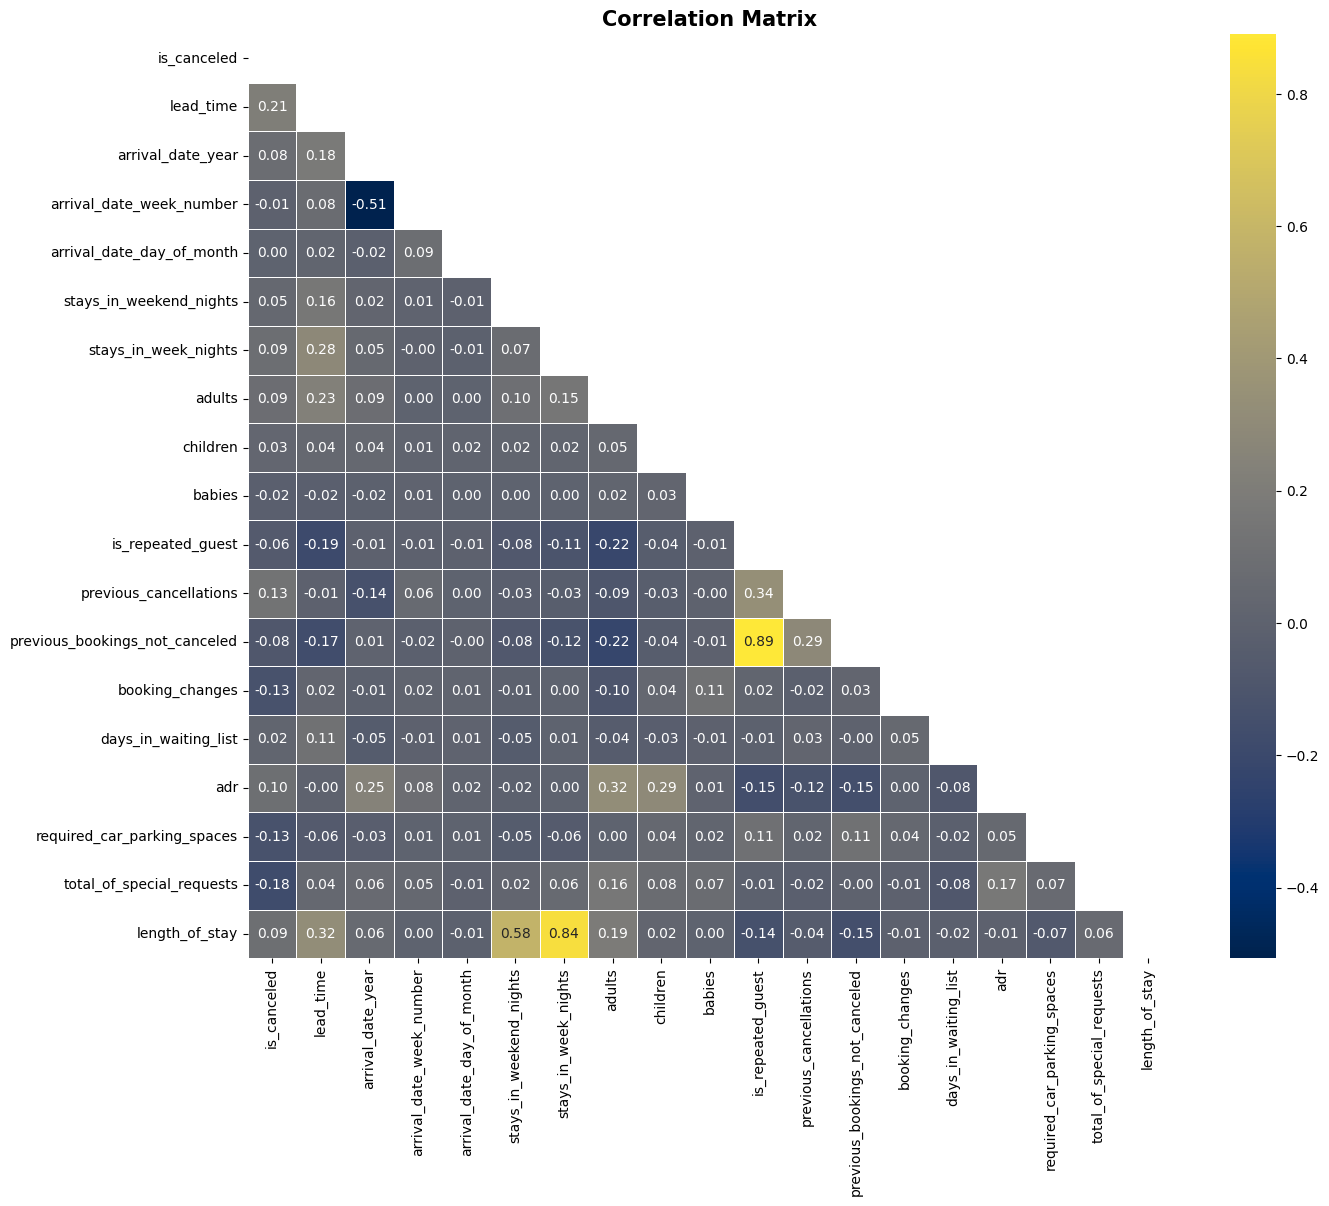

In [1851]:
plt.figure(figsize=(15, 12))
corr = df_model.corr(numeric_only=True, method='spearman')
matriks = np.triu(corr)
sns.heatmap(corr, annot=True, fmt='.2f', mask=matriks, cmap='cividis', square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

Berdasarkan pengecekan korelasi diatas, bisa di simpulkan :
- lead_time memiliki korelasi yang paling tinggi dengan is_canceled dibandingkan fitur lain. Ini berarti semakin lama jeda dari tanggal pemesanan ke tanggal check-in, maka tamu semakin berpotensi untuk membatalkan pemesanan meskipun korelasinya tergolong korelasi lemah (0.21%)
- babies memiliki korelasi yang paling kecil dengan is_canceled dibandingkan fitur lain, bahkan bisa dibilang hampir tidak ada korelasi (0.02%)
- previous_booking_not_canceled memiliki korelasi yang sangat kuat dengan is_repeat_guest (0.87%), hal ini sangat wajar karena tamu yang pernah menginap sebelumnya dan tidak membatalkan reservasi cenderung menjadi tamu berulang (repeat guest)

**Pengecekan Chi Square untuk fitur-fitur kategorikal**

In [1852]:
categorical_features = ['meal', 'market_segment', 'distribution_channel', 
                        'reserved_room_type', 'assigned_room_type', 
                        'deposit_type', 'customer_type', 'stay_category']

chi_square_results = []

for feature in categorical_features:
    contingency_table = pd.crosstab(df_model[feature], df_model['is_canceled']) 
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    significance = "Signifikan" if p < 0.05 else "Tidak Signifikan"
    
    chi_square_results.append({'Feature': feature, 'Chi': chi2, 'P-Value': p, 'Significance': significance})

chi_square_df = pd.DataFrame(chi_square_results).sort_values(by='P-Value')
chi_square_df


,Feature,Chi,P-Value,Significance
1,market_segment,2012.505523,0.000000e+00,Signifikan
5,deposit_type,1496.561683,0.000000e+00,Signifikan
2,distribution_channel,1039.943115,3.891201e-225,Signifikan
6,customer_type,755.223954,2.222051e-163,Signifikan
7,stay_category,705.545798,2.194832e-151,Signifikan
0,meal,179.971260,8.946895e-39,Signifikan
3,reserved_room_type,174.478546,1.373233e-37,Signifikan
4,assigned_room_type,101.317592,8.094159e-22,Signifikan


Berdasarkan hasil pengencekan chi-square diatas, semua fitur kategorik memiliki pengaruh yang signifikan terhadap fitur **is_canceled** yang ditandai dengan kecilnya p-value (tidak ada p-value yang nilainya melebihi 0.05). Diputuskan untuk memakai semua fitur kategorik diatas untuk pengembangan model prediktif

#### **Drop Columns**

Pada tahap ini, kita akan menghapus fitur-fitur yang tidak relevan untuk pengembangan model prediktif, dan juga akan menghapus fitur-fitur dengan memperhatikan korelasi untuk melakukan feature selection. fitur fitur yang akan kita hapus diantaranya :
- fitur **hotel** tidak diperlukan karena hanya berisi 1 data unik saja
- fitur **arrival_date_year, arrival_date_month, arrival_date_week_number dan arrival_date_day_of_month** hanya berisi informasi mengenai waktu kedatangan tamu, ini tidak diperlukan untuk model
- fitur **country** tidak diperlukan, karena kita tidak menganalisa berdasarkan negara asal tamu
- fitur **adr** tidak diperlukan untuk model prediksi pembatalan jika digunakan untuk masa depan, kita tidak bisa mengetahui nilai adr sebelum tamu benar-benar menginap atau sistem menentukan harga final
- fitur **reservation_status dan reservation_status_date** tidak diperlukan, karena fitur ini langsung menunjukkan apakah pemesanan dibatalkan atau tidak, sehingga tidak boleh digunakan dalam model prediksi
- fitur **babies** tidak dipakai karena memiliki korelasi yang kecil
- fitur **days_in_waiting_list** tidak dipakai karena memiliki korelasi yang kecil
- fitur **children** tidak dipakai karena memiliki korelasi yang kecil
- fitur **stays_in_weekend_nights** tidak dipakai karena memiliki korelasi yang kecil

Pemilihan fitur-fitur ini ditentukan juga dari hasil benchmarking terbaik dari file **FinalProjectGamma-TestModelBenchmark.ipynb**

In [1853]:
df_model.drop(['hotel','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','country','adr','reservation_status','reservation_status_date','babies','days_in_waiting_list','children','stays_in_weekend_nights'], axis=1, inplace=True)

#### **Encoding**

Pada tahap ini, kita akan melakukan encoding untuk fitur-fitur kategorikal yang ada pada dataset ini, yang akan kita lakukan adalah :
- Melakukan One Hot Encoding untuk fitur-fitur kategorikal nominal, diantaranya : `meal`, `market_segment`, `distribution_channel`, `deposit_type`, `customer_type` dan `stay_category`. Teknik ini digunakan karena fitur-fitur tersebut memiliki jumlah kategori yang sedikit dan tidak memiliki urutan yang bermakna.
- Melakukan Ordinal Encoding untuk fitur `reserved_room_type` dan `assigned_room_type`. Awalnya, kedua fitur ini hanya berisi huruf tanpa makna urutan yang jelas. Namun, setelah dilakukan pemetaan berdasarkan tarif rata-rata (ADR), kini kedua fitur ini memiliki urutan yang jelas berdasakan tipe kamar, sehingga cocok untuk Ordinal Encoding.

In [1854]:
# Ordinal mapping kolom reserved_room_type & assigned_room_type
ordinal_mapping = [
    {'col':'reserved_room_type',
    'mapping':{
        'Standard' : 0,
        'Superior': 1, 
        'Deluxe': 2, 
        'Suite' : 3
    }},
    {'col':'assigned_room_type',
    'mapping':{
        'Standard' : 0,
        'Superior': 1, 
        'Deluxe': 2, 
        'Suite' : 3
    }}
]

In [1855]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['meal','market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'stay_category']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['reserved_room_type', 'assigned_room_type'])
], remainder='passthrough')

#### **Features & Target**

In [1856]:
# Memisahkan data independen variabel dengan target
x = df_model.drop(columns=['is_canceled'])
y = df_model['is_canceled']

#### **Splitting**

In [1857]:
# Splitting data training dan test dengan proporsi 80:20
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=5)

In [1858]:
# Melihat preview hasil encoding 
testing = pd.DataFrame(transformer.fit_transform(x_train), columns=transformer.get_feature_names_out())
testing

,onehot__meal_FB,onehot__meal_HB,onehot__meal_SC,onehot__market_segment_Complementary,onehot__market_segment_Corporate,onehot__market_segment_Direct,onehot__market_segment_Groups,onehot__market_segment_Offline TA/TO,onehot__market_segment_Online TA,onehot__distribution_channel_Direct,onehot__distribution_channel_GDS,onehot__distribution_channel_TA/TO,onehot__deposit_type_Non Refund,onehot__deposit_type_Refundable,onehot__customer_type_Group,onehot__customer_type_Transient,onehot__customer_type_Transient-Party,onehot__stay_category_Extended Stay Hotel,onehot__stay_category_Residence/Apartment Hotel,onehot__stay_category_Semi-residential Hotel,onehot__stay_category_Temporary Hotel,ordinal__reserved_room_type,ordinal__assigned_room_type,remainder__lead_time,remainder__stays_in_week_nights,remainder__adults,remainder__is_repeated_guest,remainder__previous_cancellations,remainder__previous_bookings_not_canceled,remainder__booking_changes,remainder__required_car_parking_spaces,remainder__total_of_special_requests,remainder__length_of_stay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,285.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,10.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41371,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
41372,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0
41373,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
41374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,249.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0


## **6. Modelling**

#### **Choose a Benchmark Model**

In [1859]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

[LightGBM] [Info] Number of positive: 10022, number of negative: 23078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 33100, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.302779 -> initscore=-0.834097
[LightGBM] [Info] Start training from score -0.834097
[LightGBM] [Info] Number of positive: 10023, number of negative: 23078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 33101, number of used features: 30
[LightGBM] [Info] [b

,mean roc_auc,sdev
model,,
LightGBM,0.818942,0.002639
XGBoost,0.817439,0.002557
Logistic Regression,0.769588,0.003683
Random Forest,0.754052,0.002118
KNN,0.698540,0.005262
Decision Tree,0.657474,0.002870


Akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu LightGBM dan XGBoost

#### **Predict to Test Set with the Benchmark Model**

In [1860]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.78      0.93      0.85      7212
           1       0.70      0.38      0.49      3132

    accuracy                           0.76     10344
   macro avg       0.74      0.65      0.67     10344
weighted avg       0.75      0.76      0.74     10344

KNN 
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      7212
           1       0.55      0.45      0.50      3132

    accuracy                           0.72     10344
   macro avg       0.66      0.64      0.65     10344
weighted avg       0.71      0.72      0.71     10344

Decision Tree 
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      7212
           1       0.54      0.49      0.51      3132

    accuracy                           0.72     10344
   macro avg       0.66      0.65      0.66     10344
weighted avg       0.71      0

,roc_auc score
model,
XGBoost,0.824073
LightGBM,0.823989
Logistic Regression,0.780156
Random Forest,0.764285
KNN,0.721376
Decision Tree,0.670363


Terlihat bahwa model XGBoost dan LightGBM memiliki hasil yang baik pada test data

### **Resampling**

Untuk kedua model ini (XGBoost dan LightGBM) akan dicoba untuk dilakukan resampling, apakah kita bisa mendapatkan hasil yang lebih baik lagi. 
Beberapa hal yang perlu diperhatikan dalam benchmark model ini antara lain:

- Karena dataset ini tidak seimbang (imbalance), maka perlu dilakukan proses resampling. Metode yang digunakan untuk resampling adalah **RandomOverSampling** yang bertujuan untuk menambahkan data pada kelas yang minoritas dan **RandomUnderSampling** yang bertujuan untuk mengurangi data pada kelas yang mayoritas
- Dilakukan stratified K-Fold untuk menjaga distribusi kelas target agar tetap konsisten saat melakukan pembagian data untuk cross-validation.

#### **Test Oversampling with K-Fold Cross Validation**

In [1861]:
def calc_train_error(X_train, y_train, model):
    """Menghitung metrik evaluasi untuk data train."""
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:, 1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    
    return { 
        'report': report, 
        'f1': f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_validation_error(X_test, y_test, model):
    """Menghitung metrik evaluasi untuk data test."""
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:, 1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    
    return { 
        'report': report, 
        'f1': f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    """Melatih model dan menghitung metrik evaluasi train dan validation."""
    model.fit(X_train, y_train)
    
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    
    return train_error, validation_error

def evaluate_model(model, x_train, y_train, transformer):
    """Evaluasi model menggunakan k-fold cross-validation dan oversampling."""
    
    K = 10
    kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

    data = x_train
    target = y_train    

    # List untuk menyimpan hasil evaluasi
    train_errors_without_oversampling = []
    validation_errors_without_oversampling = []
    train_errors_with_oversampling = []
    validation_errors_with_oversampling = []

    for train_index, val_index in kf.split(data, target):
        
        # Membagi data menjadi training dan validation
        X_train, X_val = data.iloc[train_index], data.iloc[val_index]
        Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]

        # Oversampling
        ros = RandomOverSampler()
        X_ros, Y_ros = ros.fit_resample(X_train, Y_train)

        # Membuat pipeline model
        estimator = Pipeline([
            ('preprocess', transformer),
            ('model', model)
        ])

        # Menghitung error tanpa oversampling
        train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
        train_errors_without_oversampling.append(train_error_without_oversampling)
        validation_errors_without_oversampling.append(val_error_without_oversampling)

        # Menghitung error dengan oversampling
        train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)
        train_errors_with_oversampling.append(train_error_with_oversampling)
        validation_errors_with_oversampling.append(val_error_with_oversampling)

    # Evaluasi tanpa oversampling
    listItem = []
    for tr, val in zip(train_errors_without_oversampling, validation_errors_without_oversampling):
        listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'],
                         tr['recall'], val['recall'], tr['precision'], val['precision']])
    
    listItem.append(list(np.mean(listItem, axis=0)))
    
    dfEvaluate_without_oversampling = pd.DataFrame(listItem, 
        columns=['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC', 
                 'Train F1 Score', 'Test F1 Score', 'Train Recall', 'Test Recall', 
                 'Train Precision', 'Test Precision'])

    listIndex = list(dfEvaluate_without_oversampling.index)
    listIndex[-1] = 'Average'
    dfEvaluate_without_oversampling.index = listIndex

    # Evaluasi dengan oversampling
    listItem = []
    for tr, val in zip(train_errors_with_oversampling, validation_errors_with_oversampling):
        listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'],
                         tr['recall'], val['recall'], tr['precision'], val['precision']])
    
    listItem.append(list(np.mean(listItem, axis=0)))
    
    dfEvaluate_with_oversampling = pd.DataFrame(listItem, 
        columns=['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC', 
                 'Train F1 Score', 'Test F1 Score', 'Train Recall', 'Test Recall', 
                 'Train Precision', 'Test Precision'])

    listIndex = list(dfEvaluate_with_oversampling.index)
    listIndex[-1] = 'Average'
    dfEvaluate_with_oversampling.index = listIndex

    return dfEvaluate_without_oversampling, dfEvaluate_with_oversampling


##### **1. XGBoost**

In [1862]:
result_without_oversampling, result_with_oversampling = evaluate_model(XGBClassifier(), x_train, y_train, transformer)

print("Hasil Tanpa Oversampling:")
display(result_without_oversampling)

print("\nHasil Dengan Oversampling:")
display(result_with_oversampling)


Hasil Tanpa Oversampling:


,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.803104,0.788062,0.862257,0.810460,0.746899,0.727001,0.548027,0.520351,0.734284,0.702586
1,0.803803,0.788062,0.861963,0.822847,0.747352,0.727482,0.546785,0.522745,0.737352,0.701285
2,0.804447,0.789512,0.862684,0.819871,0.748396,0.724596,0.549002,0.501995,0.738047,0.718037
3,0.802943,0.784195,0.859347,0.824989,0.746922,0.724594,0.549002,0.526736,0.733152,0.687500
4,0.802084,0.794345,0.860981,0.824374,0.745538,0.735561,0.546075,0.533121,0.732192,0.715203
5,0.802164,0.786854,0.859179,0.821695,0.746079,0.728686,0.548559,0.534717,0.730915,0.691434
6,0.802009,0.785110,0.860328,0.817466,0.745973,0.720757,0.548776,0.503994,0.730320,0.701891
7,0.803136,0.782451,0.861020,0.812221,0.746813,0.722491,0.547357,0.524760,0.734849,0.682952
8,0.802385,0.791636,0.860511,0.824525,0.745912,0.731884,0.546519,0.527534,0.732873,0.709989
9,0.801418,0.781242,0.860029,0.813586,0.744802,0.716922,0.545632,0.502793,0.730294,0.690789



Hasil Dengan Oversampling:


,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.779359,0.737313,0.867440,0.807577,0.779327,0.706693,0.767246,0.683958,0.786295,0.553618
1,0.781285,0.747704,0.870334,0.822157,0.781283,0.721285,0.778570,0.726257,0.782821,0.564867
2,0.781901,0.753504,0.869024,0.817482,0.781898,0.721539,0.777992,0.684757,0.784123,0.578557
3,0.778204,0.748913,0.866645,0.825508,0.778198,0.721837,0.773370,0.721468,0.780919,0.567127
4,0.781073,0.744079,0.868707,0.821546,0.781069,0.714940,0.776567,0.700718,0.783629,0.562100
5,0.777568,0.746496,0.865715,0.820170,0.777556,0.716749,0.770096,0.697526,0.781779,0.566062
6,0.778955,0.736282,0.866884,0.815557,0.778954,0.706391,0.777221,0.689297,0.779925,0.551438
7,0.779937,0.736524,0.868302,0.810975,0.779927,0.707706,0.773177,0.698083,0.783773,0.551072
8,0.777904,0.747401,0.867239,0.820856,0.777880,0.717892,0.767563,0.699920,0.783773,0.567270
9,0.778424,0.742084,0.866555,0.809347,0.778416,0.710106,0.772570,0.676776,0.781723,0.561589


##### **2. LightGBM**

In [1863]:
result_without_oversampling_lgbm, result_with_oversampling_lgbm = evaluate_model(lgb.LGBMClassifier(), x_train, y_train, transformer)

print("Hasil Tanpa Oversampling:")
display(result_without_oversampling_lgbm)

print("\nHasil Dengan Oversampling:")
display(result_with_oversampling_lgbm)

[LightGBM] [Info] Number of positive: 11275, number of negative: 25963
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 37238, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.302782 -> initscore=-0.834085
[LightGBM] [Info] Start training from score -0.834085
[LightGBM] [Info] Number of positive: 25963, number of negative: 25963
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 51926, number of used features: 31
[LightGBM] [Info] [b

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.793947,0.792170,0.843489,0.810628,0.733937,0.730780,0.526829,0.519553,0.717565,0.716172
1,0.793491,0.786612,0.843577,0.824884,0.732739,0.724156,0.523016,0.513168,0.718358,0.701965
2,0.793195,0.792412,0.843777,0.821311,0.733317,0.728889,0.527361,0.509178,0.714835,0.723356
3,0.793625,0.785162,0.842308,0.827854,0.733205,0.724398,0.524701,0.521149,0.717787,0.693206
4,0.793866,0.789995,0.841726,0.826381,0.733350,0.728368,0.524257,0.517957,0.718837,0.710066
5,0.793437,0.789029,0.842826,0.819724,0.732935,0.729042,0.524257,0.525938,0.717441,0.702559
6,0.793389,0.786560,0.843664,0.814949,0.733781,0.722306,0.528734,0.504792,0.714697,0.706145
7,0.794946,0.784143,0.843953,0.813879,0.735266,0.722972,0.528645,0.519169,0.719754,0.690755
8,0.793416,0.794295,0.843527,0.826132,0.733194,0.734759,0.525676,0.529130,0.716514,0.717532
9,0.794517,0.781484,0.844145,0.812024,0.734554,0.716642,0.527184,0.500399,0.719177,0.692818



Hasil Dengan Oversampling:


,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.756731,0.745288,0.845636,0.809908,0.756617,0.715048,0.735123,0.692737,0.768327,0.564736
1,0.760525,0.753021,0.847821,0.824797,0.760461,0.726707,0.744290,0.731045,0.769268,0.572142
2,0.756114,0.755679,0.845447,0.818173,0.756033,0.724250,0.737896,0.690343,0.765799,0.581317
3,0.754381,0.752779,0.842901,0.825971,0.754155,0.725008,0.724030,0.718276,0.770821,0.573248
4,0.757674,0.752537,0.846024,0.826217,0.757462,0.721165,0.728075,0.688747,0.773888,0.576486
5,0.755055,0.755196,0.845113,0.819458,0.754853,0.725305,0.726341,0.702314,0.770595,0.578947
6,0.758541,0.742567,0.846407,0.816075,0.758397,0.710545,0.734122,0.677316,0.771816,0.561962
7,0.760929,0.742567,0.846171,0.813144,0.760758,0.711272,0.734160,0.682907,0.775689,0.561392
8,0.756644,0.751994,0.844759,0.824231,0.756434,0.723550,0.727315,0.711891,0.772636,0.572897
9,0.758512,0.739666,0.846217,0.809475,0.758382,0.706430,0.735364,0.665603,0.771060,0.558981


#### **Test Undersampling with K-Fold Cross Validation**

In [1864]:
# Fungsi untuk menghitung metrik pada training data
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    
    return { 
        'report': report, 
        'f1': f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

# Fungsi untuk menghitung metrik pada validation data
def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    
    return { 
        'report': report, 
        'f1': f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

# Fungsi untuk menjalankan model dengan undersampling
def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

# Set jumlah fold untuk Stratified KFold
K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

# Data yang digunakan untuk training
data = x_train
target = y_train	

# Fungsi untuk menjalankan evaluasi dengan undersampling pada model tertentu
def evaluate_model_with_undersampling(model, data, target, transformer):
    train_errors_without_undersampling = []
    validation_errors_without_undersampling = []

    train_errors_with_undersampling = []
    validation_errors_with_undersampling = []

    for train_index, val_index in kf.split(data, target):
        
        # Split data
        X_train, X_val = data.iloc[train_index], data.iloc[val_index]
        Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]

        # Random Undersampling
        rus = RandomUnderSampler(random_state=5)
        X_rus, Y_rus = rus.fit_resample(X_train, Y_train)

        # Model pipeline
        estimator = Pipeline([
            ('preprocess', transformer),
            ('model', model)
        ])

        # Tanpa Undersampling
        train_error_without_undersampling, val_error_without_undersampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
        train_errors_without_undersampling.append(train_error_without_undersampling)
        validation_errors_without_undersampling.append(val_error_without_undersampling)

        # Dengan Undersampling
        train_error_with_undersampling, val_error_with_undersampling = calc_metrics(X_rus, Y_rus, X_val, Y_val, estimator)
        train_errors_with_undersampling.append(train_error_with_undersampling)
        validation_errors_with_undersampling.append(val_error_with_undersampling)

    # Evaluasi hasil tanpa undersampling
    listItem = []
    for tr, val in zip(train_errors_without_undersampling, validation_errors_without_undersampling):
        listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'],
                         tr['recall'], val['recall'], tr['precision'], val['precision']])
    listItem.append(list(np.mean(listItem, axis=0)))

    dfEvaluate_without = pd.DataFrame(listItem, 
                                      columns=['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC', 
                                               'Train F1 Score', 'Test F1 Score', 'Train Recall', 'Test Recall', 
                                               'Train Precision', 'Test Precision'])
    dfEvaluate_without.index = list(dfEvaluate_without.index)
    dfEvaluate_without.rename(index={dfEvaluate_without.index[-1]: 'Average'}, inplace=True)

    # Evaluasi hasil dengan undersampling
    listItem = []
    for tr, val in zip(train_errors_with_undersampling, validation_errors_with_undersampling):
        listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'],
                         tr['recall'], val['recall'], tr['precision'], val['precision']])
    listItem.append(list(np.mean(listItem, axis=0)))

    dfEvaluate_with = pd.DataFrame(listItem, 
                                   columns=['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC', 
                                            'Train F1 Score', 'Test F1 Score', 'Train Recall', 'Test Recall', 
                                            'Train Precision', 'Test Precision'])
    dfEvaluate_with.index = list(dfEvaluate_with.index)
    dfEvaluate_with.rename(index={dfEvaluate_with.index[-1]: 'Average'}, inplace=True)


    return dfEvaluate_without, dfEvaluate_with


##### **1. XGBoost**

In [1865]:
result_without_undersampling, result_with_undersampling = evaluate_model_with_undersampling(XGBClassifier(), x_train, y_train, transformer)

print("Hasil Tanpa Oversampling:")
display(result_without_undersampling)

print("\nHasil Dengan Oversampling:")
display(result_with_undersampling)

Hasil Tanpa Oversampling:


,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.803104,0.788062,0.862257,0.810460,0.746899,0.727001,0.548027,0.520351,0.734284,0.702586
1,0.803803,0.788062,0.861963,0.822847,0.747352,0.727482,0.546785,0.522745,0.737352,0.701285
2,0.804447,0.789512,0.862684,0.819871,0.748396,0.724596,0.549002,0.501995,0.738047,0.718037
3,0.802943,0.784195,0.859347,0.824989,0.746922,0.724594,0.549002,0.526736,0.733152,0.687500
4,0.802084,0.794345,0.860981,0.824374,0.745538,0.735561,0.546075,0.533121,0.732192,0.715203
5,0.802164,0.786854,0.859179,0.821695,0.746079,0.728686,0.548559,0.534717,0.730915,0.691434
6,0.802009,0.785110,0.860328,0.817466,0.745973,0.720757,0.548776,0.503994,0.730320,0.701891
7,0.803136,0.782451,0.861020,0.812221,0.746813,0.722491,0.547357,0.524760,0.734849,0.682952
8,0.802385,0.791636,0.860511,0.824525,0.745912,0.731884,0.546519,0.527534,0.732873,0.709989
9,0.801418,0.781242,0.860029,0.813586,0.744802,0.716922,0.545632,0.502793,0.730294,0.690789



Hasil Dengan Oversampling:


,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.780355,0.725955,0.869980,0.804867,0.780311,0.698145,0.766297,0.697526,0.788465,0.536525
1,0.776541,0.736829,0.865300,0.818619,0.776501,0.712533,0.763193,0.736632,0.784126,0.548751
2,0.778581,0.745771,0.867837,0.815838,0.778558,0.717068,0.768514,0.705507,0.784305,0.564135
3,0.778226,0.743596,0.866132,0.822721,0.778167,0.719143,0.761951,0.740623,0.787587,0.557692
4,0.781242,0.733446,0.868916,0.818618,0.781237,0.707842,0.776763,0.722267,0.783784,0.545181
5,0.778537,0.727888,0.868372,0.811045,0.778529,0.703265,0.772860,0.726257,0.781735,0.537507
6,0.779665,0.737491,0.869659,0.815731,0.779621,0.708876,0.765520,0.700479,0.787807,0.552267
7,0.784454,0.726855,0.871291,0.811406,0.784393,0.700604,0.767737,0.711661,0.794293,0.536747
8,0.780222,0.741600,0.867681,0.822360,0.780180,0.715180,0.766475,0.721468,0.788144,0.556650
9,0.780266,0.740392,0.869988,0.814302,0.780257,0.713987,0.773836,0.720670,0.783917,0.555009


##### **2. LightGBM**

In [1866]:
result_without_undersampling_lgbm, result_with_undersampling_lgbm = evaluate_model_with_undersampling(lgb.LGBMClassifier(), x_train, y_train, transformer)

print("Hasil Tanpa Oversampling:")
display(result_without_undersampling_lgbm)

print("\nHasil Dengan Oversampling:")
display(result_with_undersampling_lgbm)

[LightGBM] [Info] Number of positive: 11275, number of negative: 25963
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 37238, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.302782 -> initscore=-0.834085
[LightGBM] [Info] Start training from score -0.834085
[LightGBM] [Info] Number of positive: 11275, number of negative: 11275
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 22550, number of used features: 29
[LightGBM] [Info] [b

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.793947,0.792170,0.843489,0.810628,0.733937,0.730780,0.526829,0.519553,0.717565,0.716172
1,0.793491,0.786612,0.843577,0.824884,0.732739,0.724156,0.523016,0.513168,0.718358,0.701965
2,0.793195,0.792412,0.843777,0.821311,0.733317,0.728889,0.527361,0.509178,0.714835,0.723356
3,0.793625,0.785162,0.842308,0.827854,0.733205,0.724398,0.524701,0.521149,0.717787,0.693206
4,0.793866,0.789995,0.841726,0.826381,0.733350,0.728368,0.524257,0.517957,0.718837,0.710066
5,0.793437,0.789029,0.842826,0.819724,0.732935,0.729042,0.524257,0.525938,0.717441,0.702559
6,0.793389,0.786560,0.843664,0.814949,0.733781,0.722306,0.528734,0.504792,0.714697,0.706145
7,0.794946,0.784143,0.843953,0.813879,0.735266,0.722972,0.528645,0.519169,0.719754,0.690755
8,0.793416,0.794295,0.843527,0.826132,0.733194,0.734759,0.525676,0.529130,0.716514,0.717532
9,0.794517,0.781484,0.844145,0.812024,0.734554,0.716642,0.527184,0.500399,0.719177,0.692818



Hasil Dengan Oversampling:


,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.762616,0.732721,0.849063,0.807276,0.762457,0.702238,0.736674,0.681564,0.776988,0.547085
1,0.760887,0.749638,0.848415,0.820747,0.760703,0.722687,0.733126,0.723065,0.776223,0.568025
2,0.758625,0.754471,0.847147,0.819112,0.758496,0.723545,0.735521,0.693536,0.771155,0.578947
3,0.762661,0.746496,0.847883,0.824048,0.762412,0.719627,0.730288,0.721468,0.780844,0.563591
4,0.758714,0.743838,0.847542,0.825698,0.758641,0.716546,0.741286,0.715882,0.768057,0.560275
5,0.758226,0.741421,0.846742,0.817217,0.758166,0.715089,0.742439,0.722267,0.766645,0.556238
6,0.760154,0.742809,0.848316,0.814987,0.760044,0.713509,0.738737,0.698882,0.771797,0.560179
7,0.761485,0.737249,0.849299,0.816097,0.761216,0.708363,0.727918,0.698083,0.780302,0.552116
8,0.764257,0.754653,0.848949,0.824486,0.764062,0.728500,0.735521,0.733440,0.780371,0.574375
9,0.764080,0.735315,0.851786,0.810633,0.764006,0.704703,0.746341,0.682362,0.773793,0.550902


##### **Comparison of Resampling with K-Fold Cross Validation**

In [1867]:
def format_results(df):
    df_percentage = df.copy()
    for col in df.columns:
        df_percentage[col] = df[col] * 100  # Ubah ke persentase
    df_percentage = df_percentage.round(2)  # Batasi dua angka di belakang koma
    return df_percentage

resampling_results = pd.DataFrame({
    "XGBoost Tanpa Resampling": result_without_oversampling.loc['Average'],
    "XGBoost Dengan Oversampling": result_with_oversampling.loc['Average'],
    "XGBoost Dengan Undersampling": result_with_undersampling.loc['Average'],
    "LightGBM Tanpa Resampling": result_without_oversampling_lgbm.loc['Average'],
    "LightGBM Dengan Oversampling": result_with_oversampling_lgbm.loc['Average'],
    "LightGBM Dengan Undersampling": result_with_undersampling_lgbm.loc['Average']
})

format_results(resampling_results.T)


,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
XGBoost Tanpa Resampling,80.27,78.71,86.08,81.92,74.65,72.60,54.76,51.99,73.34,70.02
XGBoost Dengan Oversampling,77.95,74.40,86.77,81.71,77.95,71.45,77.34,69.79,78.29,56.24
XGBoost Dengan Undersampling,77.98,73.60,86.85,81.56,77.98,70.97,76.83,71.83,78.64,54.90
LightGBM Tanpa Resampling,79.38,78.82,84.33,81.98,73.36,72.62,52.61,51.60,71.75,70.55
LightGBM Dengan Oversampling,75.75,74.91,84.56,81.87,75.74,71.89,73.27,69.61,77.10,57.02
LightGBM Dengan Undersampling,76.12,74.39,84.85,81.80,76.10,71.55,73.68,70.71,77.46,56.12


Dari hasil evaluasi metrik, terlihat bahwa Recall untuk kelas positif (Cancel) meningkat setelah dilakukan oversampling dibandingkan dengan model tanpa resampling. Namun, Precision untuk kelas positif mengalami penurunan.

Ini masuk akal karena oversampling meningkatkan jumlah sampel di kelas positif sehingga model lebih baik dalam mengenali kasus pembatalan (False Negative berkurang, Recall meningkat).
Namun, sebagai konsekuensinya, model juga lebih sering salah mengklasifikasikan tamu yang sebenarnya tidak akan membatalkan reservasi sebagai pembatalan (False Positive meningkat, Precision menurun).

Dampak terhadap kasus pembatalan hotel:
- Jika kita memprioritaskan False Negative (Recall lebih penting daripada Precision), model dengan undersampling lebih disarankan, karena dapat mengurangi risiko kamar kosong yang tidak tersewa akibat kesalahan model dalam mendeteksi pembatalan.
- Jika kita lebih memprioritaskan False Positive (Precision lebih penting daripada Recall), model tanpa resampling lebih disarankan, karena lebih akurat dalam memprediksi tamu yang benar-benar akan membatalkan reservasi.

Karena dalam kasus ini False Negative lebih diprioritaskan, maka model dengan undersampling adalah pilihan yang lebih tepat (Untuk selanjutnya dilakukan Hyperparameter Tuning). Dengan meningkatkan Recall, model akan lebih baik dalam mengantisipasi pembatalan, sehingga hotel dapat mengambil langkah preventif seperti menawarkan diskon, menghubungi tamu untuk konfirmasi ulang, atau menyesuaikan strategi pemasaran agar kamar tetap terisi.

### **Hyperparameter Tuning**

Pada tahap ini kita akan melakukan Hyperparameter Tuning untuk model XGBoost dan LightGBM untuk mendapatkan hasil yang lebih baik lagi. Untuk efisiensi waktu, pada tuning kali ini kita akan menggunakan method RandomizedSearchCV yang dimana metode ini memilih kombinasi secara acak dalam jumlah iterasi tertentu (n_iter)

XGBoost
1. https://xgboost.readthedocs.io/en/stable/tutorials/param_tuning.html
2. https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

LightGBM
1. https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
2. https://www.restack.io/p/hyperparameter-tuning-answer-lightgbm-random-search-cat-ai


##### **1. XGBoost**

In [1868]:
xgb = XGBClassifier()
rus = RandomUnderSampler(random_state=5)

estimator_xgb=Pipeline([
    ('undersampling',rus),
    ('preprocess',transformer),
    ('model',xgb)
])

hyperparam_space_xgb = {
    'model__n_estimators': [100, 200, 300],  # Jumlah pohon keputusan
    'model__max_depth': [3, 5, 7, 9],  # Kedalaman maksimum pohon
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],  # Ukuran langkah pembelajaran
    'model__subsample': [0.6, 0.8, 1.0],  # Proporsi sampel yang digunakan untuk setiap pohon
    'model__colsample_bytree': [0.6, 0.8, 1.0],  # Proporsi fitur yang dipilih untuk setiap pohon
    'model__gamma': [0, 0.1, 0.2, 0.3],  # Minimal reduction loss agar node baru dibuat
    'model__min_child_weight': [1, 3, 5],  # Minimal jumlah sampel untuk membuat node baru
}

random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions=hyperparam_space_xgb, 
    scoring='roc_auc', 
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=5),
    n_jobs=-1, 
    n_iter=100,
    verbose=2
 )

random_xgb.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
                   estimator=Pipeline(steps=[('undersampling',
                                              RandomUnderSampler(random_state=5)),
                                             ('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['meal',
                                                                                'market_segment',
                                                                                'distribution_channel',
                                                                                'deposit_type',
                                                                                'customer_type',
                                                                                'stay...
                                                            num_parallel_tree=None,
                                                            random_state=None, ...))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.6, 0.8,
                                                                    1.0],
                                        'model__gamma': [0, 0.1, 0.2, 0.3],
                                        'model__learning_rate': [0.01, 0.05,
                                                                 0.1, 0.2],
                                        'model__max_depth': [3, 5, 7, 9],
                                        'model__min_child_weight': [1, 3, 5],
                                        'model__n_estimators': [100, 200, 300],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   scoring='roc_auc', verbose=2)

In [1869]:
print(random_xgb.best_score_)
print(random_xgb.best_params_)

0.8195999688081834
{'model__subsample': 1.0, 'model__n_estimators': 200, 'model__min_child_weight': 1, 'model__max_depth': 9, 'model__learning_rate': 0.05, 'model__gamma': 0.1, 'model__colsample_bytree': 0.6}


Hyperparameter terbaik XGBoost dari hasil RandomSearch => `subsample` = 0.8, `n_estimators` = 200, `min_child_weight` = 3, `max_depth` = 7, `learning_rate` = 0.05, `gamma` = 0.3, `colsample_bytree` = 1.0

In [1870]:
best_model_xgb = random_xgb.best_estimator_
best_model_xgb.fit(x_train, y_train)

Pipeline(steps=[('undersampling', RandomUnderSampler(random_state=5)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['meal', 'market_segment',
                                                   'distribution_channel',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'stay_category']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'reserved_room_type',
                                                                           'data_type': d...
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=9, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [1871]:
estimator_xgb=Pipeline([
    ('undersampling',rus),
    ('preprocess',transformer),
    ('model',xgb)
])
estimator_xgb.fit(x_train, y_train)

Pipeline(steps=[('undersampling', RandomUnderSampler(random_state=5)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['meal', 'market_segment',
                                                   'distribution_channel',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'stay_category']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'reserved_room_type',
                                                                           'data_type': d...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [1872]:
y_pred_default_xgb = estimator_xgb.predict(x_test)
y_pred_proba_default_xgb = estimator_xgb.predict_proba(x_test)
y_pred_tuned_xgb = best_model_xgb.predict(x_test)
y_pred_proba_tuned_xgb = best_model_xgb.predict_proba(x_test)

roc_auc_default_xgb = roc_auc_score(y_test, y_pred_proba_default_xgb[:,1])
roc_auc_tuned_xgb = roc_auc_score(y_test, y_pred_proba_tuned_xgb[:,1])

print('ROC AUC Score Default XGB : ', roc_auc_default_xgb)
print('ROC AUC Score Tuned XGB : ', roc_auc_tuned_xgb)

ROC AUC Score Default XGB :  0.8197313447716272
ROC AUC Score Tuned XGB :  0.8223100609598449


##### **2. LightGBM**

In [1873]:
lgbm = lgb.LGBMClassifier()
rus_lgbm = RandomUnderSampler(random_state=5)

estimator=Pipeline([
    ('undersampling',rus_lgbm),
    ('preprocess',transformer),
    ('model',lgbm)
])

hyperparam_space = [{
    'model__max_bin': [255, 300, 350],  # Jumlah bin untuk histogram splitting
    'model__num_leaves': [31, 50, 70, 100],  # Meningkatkan kompleksitas decision tree
    'model__min_data_in_leaf': [20, 30, 50],  # Minimum data dalam leaf node untuk menghindari overfitting
    'model__num_iterations':[100,75, 125, 150],
    'model__learning_rate': [0.1, 0.05, 0.01], 
    'model__random_state': [5]
}]

random_lgbm = RandomizedSearchCV(
    estimator,
    param_distributions=hyperparam_space, 
    scoring='roc_auc', 
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=5),
    n_jobs=-1, 
    n_iter=100,
    verbose=2
 )

random_lgbm.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 12528, number of negative: 12528
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 25056, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
                   estimator=Pipeline(steps=[('undersampling',
                                              RandomUnderSampler(random_state=5)),
                                             ('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['meal',
                                                                                'market_segment',
                                                                                'distribution_channel',
                                                                                'deposit_type',
                                                                                'customer_type',
                                                                                'stay...
                                                                               ['reserved_room_type',
                                                                                'assigned_room_type'])])),
                                             ('model', LGBMClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions=[{'model__learning_rate': [0.1, 0.05,
                                                                  0.01],
                                         'model__max_bin': [255, 300, 350],
                                         'model__min_data_in_leaf': [20, 30,
                                                                     50],
                                         'model__num_iterations': [100, 75, 125,
                                                                   150],
                                         'model__num_leaves': [31, 50, 70, 100],
                                         'model__random_state': [5]}],
                   scoring='roc_auc', verbose=2)

In [1874]:
print(random_lgbm.best_score_)
print(random_lgbm.best_params_)

0.8192783502001527
{'model__random_state': 5, 'model__num_leaves': 70, 'model__num_iterations': 150, 'model__min_data_in_leaf': 20, 'model__max_bin': 300, 'model__learning_rate': 0.05}


Hyperparameter terbaik LGBM dari hasil RandomSearch => `num_leaves` = 50, `num_iterations` = 75, `min_data_in_leaf` = 20, `max_bin` = 300, `learning_rate` = 0.1

In [1875]:
best_model_lgbm = random_lgbm.best_estimator_
best_model_lgbm.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 12528, number of negative: 12528
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 25056, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('undersampling', RandomUnderSampler(random_state=5)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['meal', 'market_segment',
                                                   'distribution_channel',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'stay_category']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'reserved_room_type',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Standard    0
Superior    1
Deluxe      2
Suite       3
dtype: int64},
                                                                          {'col': 'assigned_room_type',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Standard    0
Superior    1
Deluxe      2
Suite       3
dtype: int64}]),
                                                  ['reserved_room_type',
                                                   'assigned_room_type'])])),
                ('model',
                 LGBMClassifier(learning_rate=0.05, max_bin=300,
                                min_data_in_leaf=20, num_iterations=150,
                                num_leaves=70, random_state=5))])

In [1876]:
estimator_lgbm=Pipeline([
    ('undersampling',rus_lgbm),
    ('preprocess',transformer),
    ('model',lgbm)
])
estimator_lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 12528, number of negative: 12528
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 413
[LightGBM] [Info] Number of data points in the train set: 25056, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('undersampling', RandomUnderSampler(random_state=5)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['meal', 'market_segment',
                                                   'distribution_channel',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'stay_category']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'reserved_room_type',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Standard    0
Superior    1
Deluxe      2
Suite       3
dtype: int64},
                                                                          {'col': 'assigned_room_type',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Standard    0
Superior    1
Deluxe      2
Suite       3
dtype: int64}]),
                                                  ['reserved_room_type',
                                                   'assigned_room_type'])])),
                ('model', LGBMClassifier())])

In [1877]:
y_pred_default_lgbm = estimator_lgbm.predict(x_test)
y_pred_proba_default_lgbm = estimator_lgbm.predict_proba(x_test)
y_pred_tuned_lgbm = best_model_lgbm.predict(x_test)
y_pred_proba_tuned_lgbm = best_model_lgbm.predict_proba(x_test)

roc_auc_default_lgbm = roc_auc_score(y_test, y_pred_proba_default_lgbm[:,1])
roc_auc_tuned_lgbm = roc_auc_score(y_test, y_pred_proba_tuned_lgbm[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default_lgbm)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned_lgbm)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
ROC AUC Score Default LGBM :  0.8204779585464556
ROC AUC Score Tuned LGBM :  0.8206905937245219


#### **Performance Comparison**

Perbandingan performa model sebelum dan sesudah dilakukan hyperparameter tuning.

In [1878]:
data = {
    "Model": ["XGBoost", "LightGBM"],
    "Default ROC AUC": [roc_auc_default_xgb, roc_auc_default_lgbm],
    "Tuned ROC AUC": [roc_auc_tuned_xgb, roc_auc_tuned_lgbm]
}

df_roc_auc = pd.DataFrame(data)
df_roc_auc["Peningkatan (%)"] = (df_roc_auc["Tuned ROC AUC"] - df_roc_auc["Default ROC AUC"]) * 100
df_roc_auc


,Model,Default ROC AUC,Tuned ROC AUC,Peningkatan (%)
0,XGBoost,0.819731,0.822310,0.257872
1,LightGBM,0.820478,0.820691,0.021264


Berdasarkan hasil diatas, Model XGBoost mengalami peningkatan sebesar 0.25% dibandingkan dengan model sebelum dilakukan tuning dan untuk Model LightGBM mengalami peningkatan sebesar 0.02%. Walaupun peningkatan pada kedua model ini tergolong kecil, ini menunjukkan bahwa tuning memberikan kontribusi positif terhadap performa model

In [1879]:
report_default_xgb = classification_report(y_test, y_pred_default_xgb)
report_tuned_xgb = classification_report(y_test, y_pred_tuned_xgb)
report_default_lgbm = classification_report(y_test, y_pred_default_lgbm)
report_tuned_lgbm = classification_report(y_test, y_pred_tuned_lgbm)

print('Classification Report Default XGBoost : \n', report_default_xgb)
print('Classification Report Tuned XGBoost : \n', report_tuned_xgb)
print('Classification Report Default LightGBM : \n', report_default_lgbm)
print('Classification Report Tuned LightGBM : \n', report_tuned_lgbm)

Classification Report Default XGBoost : 
               precision    recall  f1-score   support

           0       0.86      0.76      0.80      7212
           1       0.56      0.71      0.63      3132

    accuracy                           0.74     10344
   macro avg       0.71      0.73      0.71     10344
weighted avg       0.77      0.74      0.75     10344

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.86      0.76      0.81      7212
           1       0.57      0.72      0.63      3132

    accuracy                           0.75     10344
   macro avg       0.71      0.74      0.72     10344
weighted avg       0.77      0.75      0.76     10344

Classification Report Default LightGBM : 
               precision    recall  f1-score   support

           0       0.86      0.76      0.81      7212
           1       0.56      0.70      0.63      3132

    accuracy                           0.75     10344
   

Berdasarkan hasil perbandingan Default dan Tuned diatas, dapat disimpulkan :
1. Perbandingan Default vs Tuned XGBoost :
    - Setelah tuning, recall untuk class positif meningkat dari 0.71 menjadi 0.72, menunjukkan sedikit kenaikan dalam mendeteksi class positif (cancel)
    - Precision untuk class positif meningkat dari 0.56 menjadi 0.57, artinya prediksi class positif lebih tepat setelah tuning
    - F1-score untuk class positif tetap di 0.63, menunjukkan keseimbangan precision dan recall tidak berubah signifikan
    - Akurasi naik dari 0.74 menjadi 0.75, menunjukkan model yang sedikit lebih baik setelah tuning
2. Perbandingan Default vs Tuned LightGBM :
    - Recall untuk class positif naik dari 0.70 menjadi 0.72, menunjukkan sedikit kenaikan dalam mendeteksi class positif (cancel)
    - Precision untuk class positif naik dari 0.56 menjadi 0.57, artinya prediksi class positif lebih tepat setelah tuning
    - F1-score untuk class positif tetap di 0.63, menunjukkan keseimbangan precision dan recall tidak berubah signifikan
    - Akurasi tetap di 0.75, menunjukkan model tidak ada perubahan setelah tuning


#### **Model Interpretation**

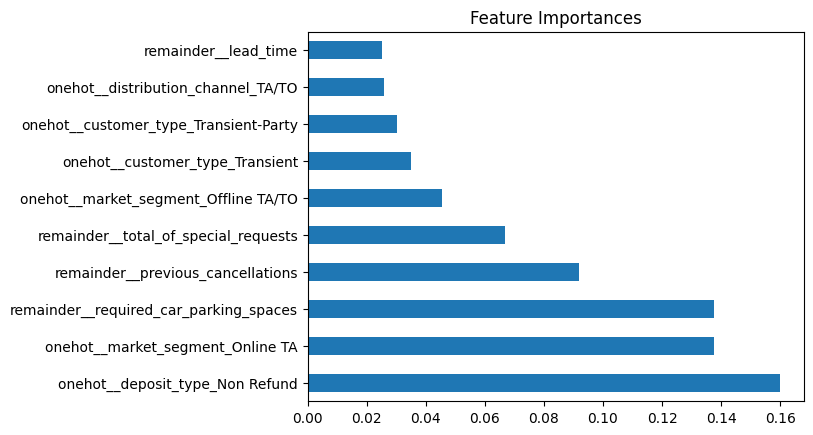

In [1880]:
coef1 = pd.Series(best_model_xgb['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Berdasarkan visualisasi Feature Importance dari model XGBoost, berikut adalah beberapa poin penting:
- `deposit_type_Non Refund` adalah fitur paling penting dalam prediksi model, dengan kontribusi terbesar dibandingkan fitur lainnya. Ini menunjukkan bahwa metode deposit (non-refundable) memiliki dampak besar terhadap target yang diprediksi (kemungkinan pembatalan pemesanan)
- `market_segment_Online TA` dan `required_car_parking_spaces` memiliki pengaruh signifikan, yang berarti segmen pasar pemesanan online melalui travel agent dan jumlah permintaan tempat parkir dapat menjadi faktor utama dalam pembatalan
-  `remainder__previous_cancellations` memiliki kontribusi cukup tinggi, jumlah pembatalan sebelumnya dapat menjadi indikasi kebiasaan tamu dalam membatalkan pemesanan

In [1883]:
# Model Akhir
best_model = random_xgb.best_estimator_
final_model = best_model.fit(x_train, y_train)

In [1885]:
# save model
best_model = random_xgb.best_estimator_
final_model = best_model.fit(x_train, y_train)
pickle.dump(final_model, open('Model_final.pkl', 'wb'))

Dalam penerapan model, ada beberapa langkah penting yang perlu diperhatikan, yaitu sebelum menggunakan model, data harus melalui beberapa proses yang telah ditentukan, antara lain:

1. Menghapus duplikat data.
2. Handling missing value.
3. Handling outlier dengan menghapus data anomaly pada kolom tertentu.
4. Melakukan Encoding untuk fitur kategorikal
5. Menggunakan model untuk memprediksi apakah tamu berpotensi cancel atau tidak.

## **7. Conclusion**

| Aktual / Prediksi | Prediction No Canceled (Book) | Prediction Canceled |
| --- | --- | --- |
| Actual No Canceled (Book) | 0,76  | 0,24 |
| Actual canceled | 0,28 | 0,72 |


-   Model yang digunakan adalah XGBoost dengan Undersampling. Dari model yang digunakan, didpatkan kesimpulan:
1.	Model dapat mengidentifikasi pelanggan yang no-canceled dengan benar sebanyak 76% (TN Rate).
2.	Model dapat mengidentifikasi pelanggan yang akan canceled dengan benar sebanyak 72% (TP Rate).
3.	Sebanyak 24% pelanggan yang seharusnya no-canceled, malah diprediksi akan canceled (FP rate).
4.	Sebanyak 28% pelanggan yang seharusnya canceled, malah diprediksi tidak canceled (FN Rate).
-	Model Limitation: Model ini menggunakan batasan lead time maksimum selama 1 tahun (365 hari), yang berarti pemesanan hanya dapat dilakukan dengan rentang waktu maksimal 365 hari dari tanggal check-in yang diinginkan.




## **Business Calculation**

Bila seandainya biaya untuk reservasi kamar standard sebesar 100,42 Euro (Berdasarkan ADR kamar tipe standar yang paling murah) dan andaikan jumlah reservasi yang hotel dapatkan untuk suatu kurun waktu sebanyak 200 (dimana andaikan 100 Cancelled dan 100 tidak canceled), maka hitungannya kurang lebih seperti ini:

**1. Tanpa Model (Semua Reservasi Diproses Seperti Biasa)**

Jika tidak ada model prediksi, maka semua reservasi akan diproses tanpa mempertimbangkan kemungkinan pembatalan.
-	Pendapatan Potensial (Jika semua menginap)
200 x 100,42 = 20.084 euro
-	Kerugian Akibat Pembatalan
100 x 100,42 = 10.042 euro
-	Pendapatan Aktual setelah Pembatalan
20.084 – 10.042 = 10.042 euro
Tanpa model, kerugian akibat pembatalan mencapai 10.042 euro 

**2. Dengan Model Prediksi Pembatalan**
-	Recall canceled 72%, maka model dapat mengidentifikasi 72% dari 100 reservasi yang akan dibatalkan (72 reservasi).
-	Recall untuk non-canceled 76%, maka Model dapat mengidentifikasi 76% dari 100 reservasi yang benar-benar tidak akan dibatalkan (76 reservasi).
-	False positive (reservasi yang sebenarnya tidak dibatalkan tetapi diprediksi akan dibatalkan) = 24% (24 reservasi).
-	False negative (reservasi yang sebenarnya dibatalkan tetapi diprediksi tidak akan dibatalkan) = 28% (28 reservasi).

**3. Prediksi model**

**1. Reservasi yang diprediksi akan dibatalkan (Positif model)**

72% x 100 = 72 Reservasi
-	Apabila hotel bisa menawarkan promosi (misal diskon atau fleksibilitas re-schedule) untuk mengurangi pembatalan dan berhasil mempertahankan 30% pelanggan, maka: 30% x 72 = 22 reservasi tetap menginap
-	Pendapatan tambahan dari pelanggan yang tetap meinginap: 22 x 100,42 = 2.209,24 euro

**2. Reservasi yang salah diprediksi (Actual tidak canceled, prediksi canceled) (False positive)**

24% x 100 = 24 reservasi

**3. Reservasi yang salah diprediksi (Actual Canceled, prediksi tidak canceled) (False negative)**

29% x 100 = 29 reservasi
-	Pendapatan yang hilang akibat pembatalan ini: 28 x 100,42 = 2.811,76 euro

**4. Pendapatan setelah menggunakan model**
-	Pendapatan dari reservasi non-canceled tetap: 100 x 100,42 = 10,042 euro
-	Pendapatan tambahan dari reservasi yang berhasil di selamatkan: 2.209,24 euro
-	Total pendapatan setelah strategi mitigasi: 10.042 + 2.209,24 = 12.219,282 euro
-	Kerugian akibat false negatives yang tidak dapat diselamatkan: 2.811,76 euro


**Kesimpulan:**
-	Tanpa model, pendapatan 10.042 euro, dengan kerugian 10.042 euro akibat pembatalan.
-	Dengan model, pendapatan meningkat menjadi 12.219,282 euro, karena model memungkinkan hotel mempertahankan 22 reservasi yang seharusnya dibatalkan.
-	Penghematan sebesar 2.209,24 euro dengan strategi mitigasi berdasarkan prediksi model.
-	Model masih memiliki false negatives, yang menyebabkan kerugian 2.811,76 euro.




## **6. Recommendations**

### **Rekomendasi Model**

Untuk dapat meningkatkan recall, dapat dilakukan:
-	**Kumpulkan lebih banyak data**, Khususnya dalam kasus ketidakseimbangan target, sebaiknya jumlah data pemesanan yang dibatalkan lebih seimbang dengan data pemesanan yang tidak dibatalkan, jika memungkinkan.
-	**Penyesuaian threshold prediksi (misalnya menurunkan dari 0.5 ke 0.4).**
-	**Menggunakan model balancing lain seperti focal loss atau cost-sensitive learning.**
-	**Melakukan hyperparameter tuning lebih lanjut untuk meningkatkan recall.**

### **Rekomendasi Bisnis**
- Membuat kebijakan untuk pemberian voucher pada tamu dengan lead time lebih dari 25 hari.
- Membuat kebijakan baru untuk harga kamar saat high season dan low season.
- Pembuatan kesepakatan baru terkait deposit dengan TA/TO serta GDS. 
- Memastikan kelengkapan informasi mengenai fasilitas, layanan, dan keunggulan hotel di website.
- Menetapkan syarat pembatalan untuk reservasi, dimana tamu wajib memberikan review atau alasan pembatalan.
- Menetapkan kebijakan baru untuk biaya deposit saat memesan langsung pada pihak hotel (Melalui Website resmi hotel maupun datang secara langsung ke hotel).
- Menggunakan model machine learning yang telah dibuat sebagai solusi untuk menentukan strategi pemasaran yang tepat sasaran. 
